In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import math
import psycopg2 as psy
from sqlalchemy import create_engine
from sqlalchemy.engine.url import URL
import pandas.io.sql as psql
%matplotlib inline


In [36]:
connection = psy.connect("dbname=nytd_clean_data user=cguy")

cohort_1 = psql.read_sql("SELECT * FROM cohort_1", connection)

In [37]:
cohort_1 = cohort_1.drop('index',axis=1)
cohort_1.head()

,Wave,StFCID,RepDate_outcomes,OutcmRpt,OutcmDte,OutcmFCS,CurrFTE,CurrPTE,EmplySklls,SocSecrty,...,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Race,RaceEthn,AgeMP
0,Wave 1: Age 17 Baseline Survey,AK450290395006,2011-03-01,Youth participated,2010-10-08,"Yes, is in FC on Date",No,No,No,"Yes, is receiving SSI or SSDI payments",...,0,0,0,0,0,0,1,1,1,17
1,Wave 1: Age 17 Baseline Survey,AK450290395006,2011-03-01,Youth participated,2010-10-08,"Yes, is in FC on Date",No,No,No,"Yes, is receiving SSI or SSDI payments",...,0,0,0,0,0,0,1,1,1,17
2,Wave 2: Age 19 Followup,AK450290395006,2013-03-01,Youth participated,2012-12-28,"No, is not in FC on Date",No,No,No,No,...,0,0,0,0,0,0,1,1,1,17
3,Wave 2: Age 19 Followup,AK450290395006,2013-03-01,Youth participated,2012-12-28,"No, is not in FC on Date",No,No,No,No,...,0,0,0,0,0,0,1,1,1,17
4,Wave 1: Age 17 Baseline Survey,AK450448396586,2011-03-01,Youth participated,2010-12-28,"Yes, is in FC on Date",No,No,Yes,No,...,0,0,0,0,0,0,0,3,3,17


In [38]:
wave_stID = cohort_1[['Wave', 'StFCID']]
wave_stID.head()

,Wave,StFCID
0,Wave 1: Age 17 Baseline Survey,AK450290395006
1,Wave 1: Age 17 Baseline Survey,AK450290395006
2,Wave 2: Age 19 Followup,AK450290395006
3,Wave 2: Age 19 Followup,AK450290395006
4,Wave 1: Age 17 Baseline Survey,AK450448396586


In [39]:
c1w1 = cohort_1.loc[cohort_1['Wave'] == "Wave 1: Age 17 Baseline Survey"]
c1w2 = cohort_1.loc[cohort_1['Wave'] == "Wave 2: Age 19 Followup"]
c1w1.describe()

,Weight,FY,StFIPS,Sex,AmIAKN,Asian,BlkAfrAm,HawaiiPI,White,RaceUnkn,...,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Race,RaceEthn,AgeMP
count,12018.000000,22111.0,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000,22111.00000,22111.000000,22111.000000,...,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000
mean,2.015134,2011.0,24.522455,1.506897,0.033603,0.015241,0.352132,0.00493,0.530143,1.455294,...,12.439103,12.380173,12.286192,12.194609,12.192936,12.219619,12.273167,11.988422,5.280494,16.560355
std,1.465403,0.0,17.300343,0.499964,0.180210,0.122514,0.477646,0.07004,0.499102,10.436163,...,27.925521,27.950643,27.990404,28.028794,28.029492,28.018345,27.995886,29.961278,15.140712,0.528911
min,0.700000,2011.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,14.000000
25%,NaN,2011.0,6.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,16.000000
50%,NaN,2011.0,22.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,17.000000
75%,NaN,2011.0,36.000000,2.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,6.000000,17.000000
max,18.650000,2011.0,72.000000,2.000000,1.000000,1.000000,1.000000,1.00000,1.000000,77.000000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,99.000000,99.000000,20.000000


In [40]:
c1w2.describe()

,Weight,FY,StFIPS,Sex,AmIAKN,Asian,BlkAfrAm,HawaiiPI,White,RaceUnkn,...,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Race,RaceEthn,AgeMP
count,7280.000000,11906.0,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,...,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000
mean,3.530985,2011.0,24.591886,1.510331,0.042332,0.014111,0.338821,0.005627,0.573156,0.467579,...,3.875777,3.810180,3.710398,3.577524,3.592306,3.622291,3.681253,9.035612,3.963716,16.512347
std,3.376826,0.0,16.405165,0.499914,0.201353,0.117952,0.473329,0.074808,0.494640,5.887108,...,16.008149,16.021843,16.042136,16.068158,16.065320,16.059519,16.047942,25.736902,11.456084,0.500204
min,0.880000,2011.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,16.000000
25%,NaN,2011.0,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,16.000000
50%,NaN,2011.0,22.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,17.000000
75%,NaN,2011.0,37.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,17.000000
max,80.710000,2011.0,56.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,77.000000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,99.000000,99.000000,18.000000


In [41]:
c1w1_noDups = c1w1.drop_duplicates('StFCID')

In [42]:
c1w1_noDups.describe()

,Weight,FY,StFIPS,Sex,AmIAKN,Asian,BlkAfrAm,HawaiiPI,White,RaceUnkn,...,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Race,RaceEthn,AgeMP
count,7405.000000,13743.0,13743.000000,13743.000000,13743.000000,13743.000000,13743.000000,13743.000000,13743.000000,13743.000000,...,13743.000000,13743.000000,13743.000000,13743.000000,13743.000000,13743.000000,13743.000000,13743.000000,13743.000000,13743.000000
mean,1.995284,2011.0,23.951830,1.504475,0.034490,0.015135,0.353489,0.005166,0.526232,1.379102,...,10.836499,10.774358,10.683985,10.593102,10.586408,10.616168,10.675689,12.199738,5.140872,16.711999
std,1.396944,0.0,17.121035,0.499998,0.182491,0.122094,0.478070,0.071693,0.499330,10.167792,...,26.335660,26.359967,26.395016,26.429904,26.432460,26.421084,26.398215,30.220365,14.729140,0.478629
min,0.700000,2011.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,14.000000
25%,NaN,2011.0,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,16.000000
50%,NaN,2011.0,22.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,17.000000
75%,NaN,2011.0,36.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,6.000000,17.000000
max,18.650000,2011.0,72.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,77.000000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,99.000000,99.000000,20.000000


In [43]:
c1w1_noDups.head()

,Wave,StFCID,RepDate_outcomes,OutcmRpt,OutcmDte,OutcmFCS,CurrFTE,CurrPTE,EmplySklls,SocSecrty,...,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Race,RaceEthn,AgeMP
0,Wave 1: Age 17 Baseline Survey,AK450290395006,2011-03-01,Youth participated,2010-10-08,"Yes, is in FC on Date",No,No,No,"Yes, is receiving SSI or SSDI payments",...,0,0,0,0,0,0,1,1,1,17
4,Wave 1: Age 17 Baseline Survey,AK450448396586,2011-03-01,Youth participated,2010-12-28,"Yes, is in FC on Date",No,No,Yes,No,...,0,0,0,0,0,0,0,3,3,17
8,Wave 1: Age 17 Baseline Survey,AK450461296715,2011-03-01,Not in sample,NaT,"Yes, is in FC on Date","Yes, employed full time","Yes, employed part time",Yes,"Yes, is receiving SSI or SSDI payments",...,0,0,0,0,0,0,1,1,1,17
10,Wave 1: Age 17 Baseline Survey,AK450540097503,2011-03-01,Youth participated,2010-10-13,"Yes, is in FC on Date",No,"Yes, employed part time",No,"Yes, is receiving SSI or SSDI payments",...,0,0,0,0,0,1,1,1,1,17
14,Wave 1: Age 17 Baseline Survey,AK450652098623,2011-03-01,Youth participated,2011-03-17,"Yes, is in FC on Date",No,No,Yes,No,...,0,0,0,0,0,0,0,1,1,17


In [44]:
c1w2_noDups = c1w2.drop_duplicates('StFCID')

In [45]:
c1w2_noDups.describe()

,Weight,FY,StFIPS,Sex,AmIAKN,Asian,BlkAfrAm,HawaiiPI,White,RaceUnkn,...,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Race,RaceEthn,AgeMP
count,4499.000000,7354.0,7354.000000,7354.000000,7354.000000,7354.000000,7354.000000,7354.000000,7354.000000,7354.000000,...,7354.000000,7354.000000,7354.000000,7354.000000,7354.000000,7354.000000,7354.000000,7354.000000,7354.000000,7354.000000
mean,3.421336,2011.0,24.421539,1.507887,0.042834,0.014142,0.338047,0.006119,0.571798,0.443840,...,3.318874,3.252516,3.154474,3.023797,3.033315,3.070574,3.132853,9.111504,3.883601,16.673647
std,3.121785,0.0,16.349738,0.499972,0.202496,0.118084,0.473077,0.077990,0.494852,5.733879,...,14.748996,14.761526,14.779473,14.802351,14.800725,14.794298,14.783340,25.858339,11.113024,0.468910
min,0.880000,2011.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,16.000000
25%,NaN,2011.0,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,16.000000
50%,NaN,2011.0,22.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,17.000000
75%,NaN,2011.0,37.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,17.000000
max,80.710000,2011.0,56.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,77.000000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,99.000000,99.000000,17.000000


In [46]:
c1w2_noDups.head()

,Wave,StFCID,RepDate_outcomes,OutcmRpt,OutcmDte,OutcmFCS,CurrFTE,CurrPTE,EmplySklls,SocSecrty,...,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Race,RaceEthn,AgeMP
2,Wave 2: Age 19 Followup,AK450290395006,2013-03-01,Youth participated,2012-12-28,"No, is not in FC on Date",No,No,No,No,...,0,0,0,0,0,0,1,1,1,17
6,Wave 2: Age 19 Followup,AK450448396586,2013-03-01,Youth participated,2012-12-03,"No, is not in FC on Date",No,No,No,No,...,0,0,0,0,0,0,0,3,3,17
12,Wave 2: Age 19 Followup,AK450540097503,2013-03-01,Youth participated,2013-01-17,"No, is not in FC on Date",No,No,No,No,...,0,0,0,0,0,1,1,1,1,17
15,Wave 2: Age 19 Followup,AK450652098623,2013-03-01,Youth participated,2012-11-19,"No, is not in FC on Date",No,"Yes, employed part time",No,No,...,0,0,0,0,0,0,0,1,1,17
18,Wave 2: Age 19 Followup,AK451448406587,2013-09-01,Youth participated,2013-05-17,"No, is not in FC on Date","Yes, employed full time",No,No,No,...,0,0,0,0,0,0,1,3,3,17


In [47]:
# Create list of Wave2 ID's
# Create dataframe of W1 participants who are W2 participants using list

wave_2 = c1w2_noDups[['StFCID']]
list(wave_2)

['StFCID']

In [48]:
c1w1_onlyw2 = c1w1_noDups.loc[c1w1_noDups['StFCID'].isin(wave_2.StFCID.values)]


In [49]:
c1w1_onlyw2.head()

,Wave,StFCID,RepDate_outcomes,OutcmRpt,OutcmDte,OutcmFCS,CurrFTE,CurrPTE,EmplySklls,SocSecrty,...,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Race,RaceEthn,AgeMP
0,Wave 1: Age 17 Baseline Survey,AK450290395006,2011-03-01,Youth participated,2010-10-08,"Yes, is in FC on Date",No,No,No,"Yes, is receiving SSI or SSDI payments",...,0,0,0,0,0,0,1,1,1,17
4,Wave 1: Age 17 Baseline Survey,AK450448396586,2011-03-01,Youth participated,2010-12-28,"Yes, is in FC on Date",No,No,Yes,No,...,0,0,0,0,0,0,0,3,3,17
10,Wave 1: Age 17 Baseline Survey,AK450540097503,2011-03-01,Youth participated,2010-10-13,"Yes, is in FC on Date",No,"Yes, employed part time",No,"Yes, is receiving SSI or SSDI payments",...,0,0,0,0,0,1,1,1,1,17
14,Wave 1: Age 17 Baseline Survey,AK450652098623,2011-03-01,Youth participated,2011-03-17,"Yes, is in FC on Date",No,No,Yes,No,...,0,0,0,0,0,0,0,1,1,17
17,Wave 1: Age 17 Baseline Survey,AK451448406587,2011-09-01,Youth participated,2011-05-25,"Yes, is in FC on Date",No,No,No,No,...,0,0,0,0,0,0,1,3,3,17


In [50]:
c1w1_onlyw2.describe()

,Weight,FY,StFIPS,Sex,AmIAKN,Asian,BlkAfrAm,HawaiiPI,White,RaceUnkn,...,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Race,RaceEthn,AgeMP
count,7328.000000,7328.0,7328.000000,7328.000000,7328.000000,7328.000000,7328.00000,7328.000000,7328.000000,7328.000000,...,7328.000000,7328.000000,7328.000000,7328.000000,7328.000000,7328.000000,7328.000000,7328.000000,7328.000000,7328.000000
mean,1.998709,2011.0,24.459607,1.508597,0.042576,0.014192,0.33911,0.006141,0.570688,0.445278,...,3.329967,3.261736,3.164984,3.034116,3.043805,3.081332,3.143832,9.125000,3.886736,16.673717
std,1.403456,0.0,16.345358,0.499960,0.201914,0.118290,0.47344,0.078128,0.495012,5.743981,...,14.773944,14.786853,14.804598,14.827563,14.825904,14.819415,14.808391,25.878989,11.131422,0.468884
min,0.700000,2011.0,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,16.000000
25%,1.180000,2011.0,8.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,16.000000
50%,1.480000,2011.0,22.000000,2.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,17.000000
75%,2.340000,2011.0,37.000000,2.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,17.000000
max,18.650000,2011.0,56.000000,2.000000,1.000000,1.000000,1.00000,1.000000,1.000000,77.000000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,99.000000,99.000000,17.000000


In [51]:
frames = [c1w1_onlyw2, c1w2_noDups]

cohort_1_w1w2 = pd.concat(frames)

In [52]:
cohort_1_w1w2.Wave.value_counts()

Wave 2: Age 19 Followup           7354
Wave 1: Age 17 Baseline Survey    7328
Name: Wave, dtype: int64

In [53]:
wave_1 = c1w1_noDups[['StFCID']]
list(wave_1)
cohort_1_w1w2 = cohort_1_w1w2.loc[cohort_1_w1w2['StFCID'].isin(wave_1.StFCID.values)]


In [54]:
cohort_1_w1w2.Wave.value_counts()

Wave 1: Age 17 Baseline Survey    7328
Wave 2: Age 19 Followup           7328
Name: Wave, dtype: int64

In [55]:
# Dropping non-important features:

cohort_1_w1w2 = cohort_1_w1w2.drop(['SocSecrty','EmplySklls', 'EducAid','Children','Marriage','CnctAdult'], axis=1)

In [56]:
cohort_1_w1w2.columns

Index([u'Wave', u'StFCID', u'RepDate_outcomes', u'OutcmRpt', u'OutcmDte',
       u'OutcmFCS', u'CurrFTE', u'CurrPTE', u'PubFinAs', u'PubFoodAs',
       u'PubHousAs', u'OthrFinAs', u'HighEdCert', u'CurrenRoll', u'Homeless',
       u'SubAbuse', u'Incarc', u'Medicaid', u'OthrHlthIn', u'MedicalIn',
       u'MentlHlthIn', u'PrescripIn', u'SampleState', u'InSample', u'Baseline',
       u'FY11Cohort', u'Elig19', u'Weight', u'Responded', u'FY',
       u'RepDate_services', u'StFIPS', u'St', u'DOB', u'Sex', u'AmIAKN',
       u'Asian', u'BlkAfrAm', u'HawaiiPI', u'White', u'RaceUnkn', u'RaceDcln',
       u'HisOrgin', u'FCStatSv', u'TribeSv', u'DelinqntSv', u'EdLevlSv',
       u'SpecEdSv', u'ILNAsv', u'AcSuppSv', u'PSEdSuppSv', u'CareerSv',
       u'EmplyTrSv', u'BudgetSv', u'HousEdSv', u'HlthEdSv', u'FamSuppSv',
       u'MentorSv', u'SILsv', u'RmBrdFASv', u'EducFinaSv', u'OthrFinaSv',
       u'Race', u'RaceEthn', u'AgeMP'],
      dtype='object')

In [57]:
# Seperate dataframe into feature vars and target vars

targets = cohort_1_w1w2[['PubFoodAs','PubHousAs','OthrFinAs','HighEdCert','CurrFTE','CurrPTE', \
                     'PubFinAs','CurrenRoll','PrescripIn','Homeless','SubAbuse','Incarc','Medicaid','OthrHlthIn','MedicalIn','MentlHlthIn', 'Wave']]


features = cohort_1_w1w2[['ILNAsv','AcSuppSv','PSEdSuppSv','CareerSv','EmplyTrSv','BudgetSv','HousEdSv','HlthEdSv',\
                     'FamSuppSv','MentorSv','SILsv','RmBrdFASv','EducFinaSv','OthrFinaSv', 'Wave']]


In [58]:
for column in features:
    print (column + str(features[column].unique()))

ILNAsv[ 0  1 77]
AcSuppSv[ 0  1 77]
PSEdSuppSv[ 0  1 77]
CareerSv[ 0  1 77]
EmplyTrSv[ 0  1 77]
BudgetSv[ 0  1 77]
HousEdSv[ 1  0 77]
HlthEdSv[ 0  1 77]
FamSuppSv[ 0  1 77]
MentorSv[ 0  1 77]
SILsv[ 0  1 77]
RmBrdFASv[ 0  1 77]
EducFinaSv[ 0  1 77]
OthrFinaSv[ 1  0 77]
Wave['Wave 1: Age 17 Baseline Survey' 'Wave 2: Age 19 Followup']


In [59]:
for column in targets:
    print (column + str(targets[column].unique()))

PubFoodAs['No' 'Yes' 'Declined' 'Not Applicable (in Foster Care)' 'Blank']
PubHousAs['No' 'Yes' 'Declined' 'Blank' 'Not Applicable (in Foster Care)']
OthrFinAs['No' 'Declined' 'Yes' 'Blank']
HighEdCert['None of the above' 'High school diploma/GED' 'Declined'
 'Vocational certificate' 'Higher degree' "Bachelor's Degree"
 'Vocational license' 'Blank' "Associate's Degree" None]
CurrFTE['No' 'Yes, employed full time' 'Declined' 'Blank']
CurrPTE['No' 'Yes, employed part time' 'Declined' 'Blank']
PubFinAs['No' 'Yes' 'Declined' 'Not Applicable (in Foster Care)' 'Blank']
CurrenRoll['Yes' 'No' 'Declined' 'Blank']
PrescripIn['Yes' 'No' 'Not Applicable' "Don't Know" 'Declined' 'Blank']
Homeless['No' 'Yes' 'Blank' 'Declined']
SubAbuse['Yes' 'No' 'Declined' 'Blank']
Incarc['No' 'Yes' 'Blank' 'Declined']
Medicaid['Yes' 'No' 'Do Not Know' 'Declined' 'Blank']
OthrHlthIn['No' 'Do Not Know' 'Yes' 'Declined' 'Blank' '88.0' '78.0']
MedicalIn["Don't Know" 'No' 'Yes' 'Not Applicable' 'Declined' 'Blank']
Men

In [65]:
# # Create column for number of services received

# for every column in features:
#     for every row in column:
#         if row value == 1:
#             add 1 to new column
            
            
# features['No_Services'] = features.apply(lambda row: row['A'] + row['B'], axis=1)

# services_count = features.T
# (df==1).sum()
# services_count = services_count.drop('Wave')

# (df==1).sum()
features['Num_services'] = (services_count == 1).sum()
features

/Users/cguy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Wave,Num_services
0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,Wave 1: Age 17 Baseline Survey,2
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Wave 1: Age 17 Baseline Survey,1
10,1,0,0,0,0,0,0,0,0,0,0,0,1,1,Wave 1: Age 17 Baseline Survey,3
14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Wave 1: Age 17 Baseline Survey,1
17,1,0,0,0,0,0,0,0,0,0,0,0,0,1,Wave 1: Age 17 Baseline Survey,2
19,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Wave 1: Age 17 Baseline Survey,1
21,1,0,0,0,0,0,1,1,0,0,0,0,0,1,Wave 1: Age 17 Baseline Survey,4
25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,Wave 1: Age 17 Baseline Survey,2
29,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Wave 1: Age 17 Baseline Survey,1
31,1,0,0,0,0,0,0,0,0,0,0,0,0,1,Wave 1: Age 17 Baseline Survey,2


In [28]:
cohort_1_w1w2.columns

Index([u'Wave', u'StFCID', u'RepDate_outcomes', u'OutcmRpt', u'OutcmDte',
       u'OutcmFCS', u'CurrFTE', u'CurrPTE', u'PubFinAs', u'PubFoodAs',
       u'PubHousAs', u'OthrFinAs', u'HighEdCert', u'CurrenRoll', u'Homeless',
       u'SubAbuse', u'Incarc', u'Medicaid', u'OthrHlthIn', u'MedicalIn',
       u'MentlHlthIn', u'PrescripIn', u'SampleState', u'InSample', u'Baseline',
       u'FY11Cohort', u'Elig19', u'Weight', u'Responded', u'FY',
       u'RepDate_services', u'StFIPS', u'St', u'DOB', u'Sex', u'AmIAKN',
       u'Asian', u'BlkAfrAm', u'HawaiiPI', u'White', u'RaceUnkn', u'RaceDcln',
       u'HisOrgin', u'FCStatSv', u'TribeSv', u'DelinqntSv', u'EdLevlSv',
       u'SpecEdSv', u'ILNAsv', u'AcSuppSv', u'PSEdSuppSv', u'CareerSv',
       u'EmplyTrSv', u'BudgetSv', u'HousEdSv', u'HlthEdSv', u'FamSuppSv',
       u'MentorSv', u'SILsv', u'RmBrdFASv', u'EducFinaSv', u'OthrFinaSv',
       u'Race', u'RaceEthn', u'AgeMP'],
      dtype='object')

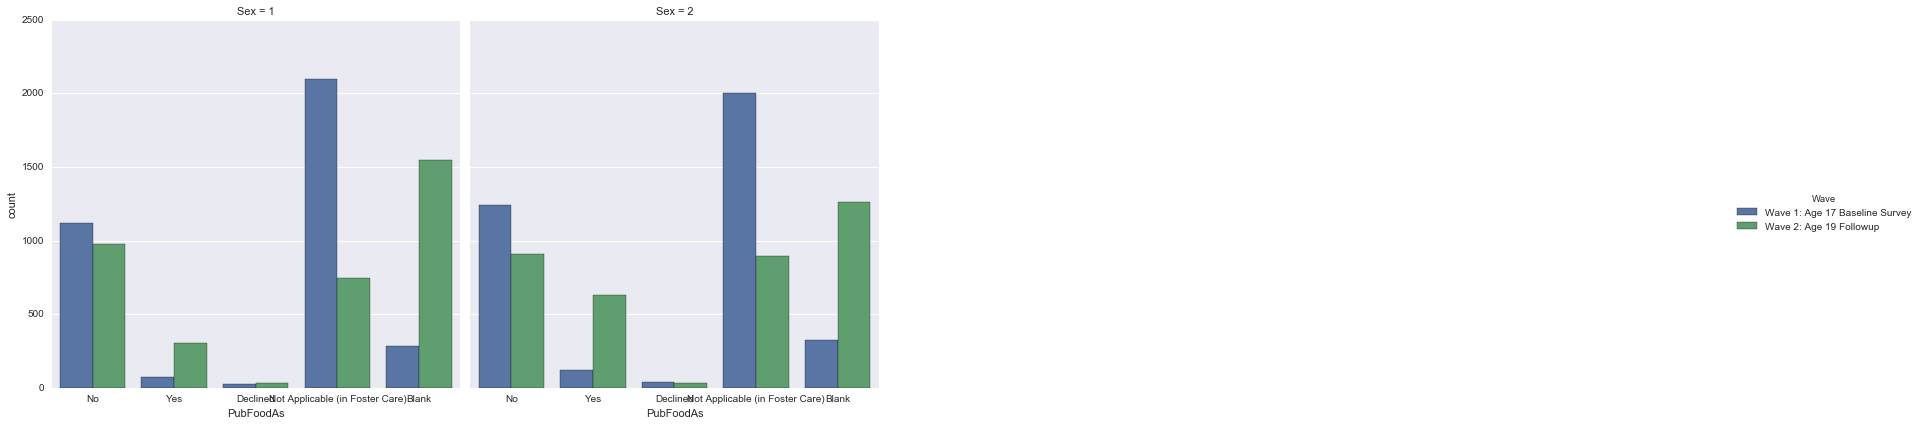

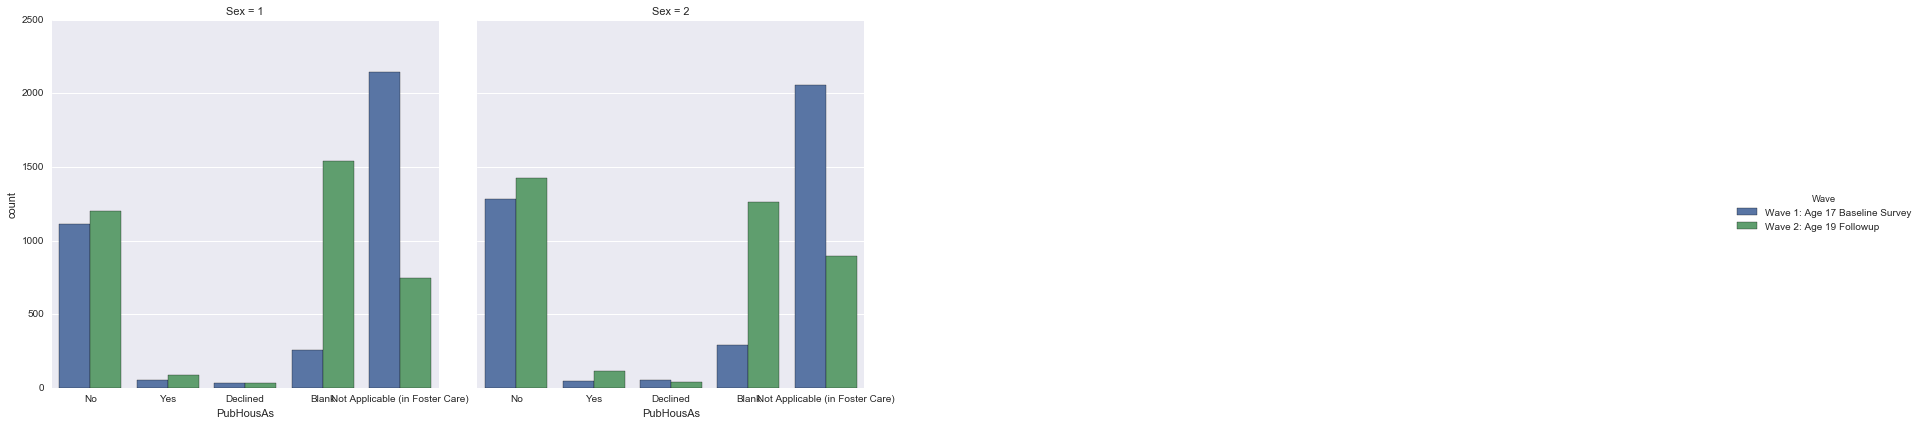

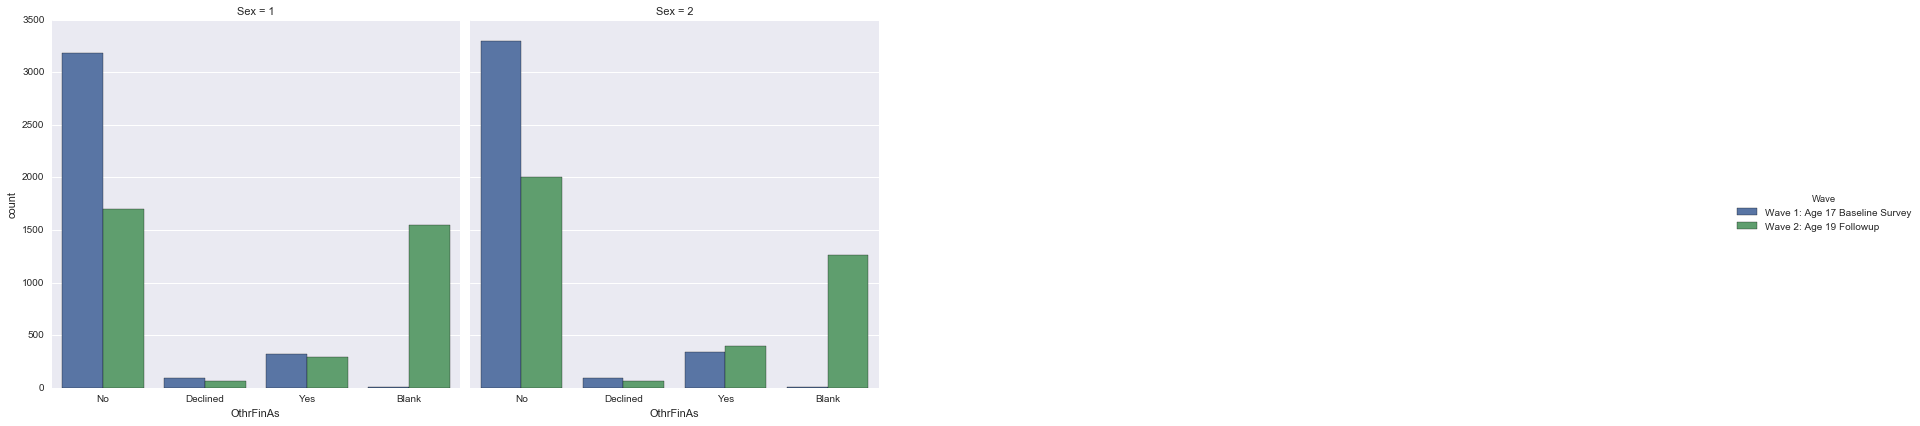

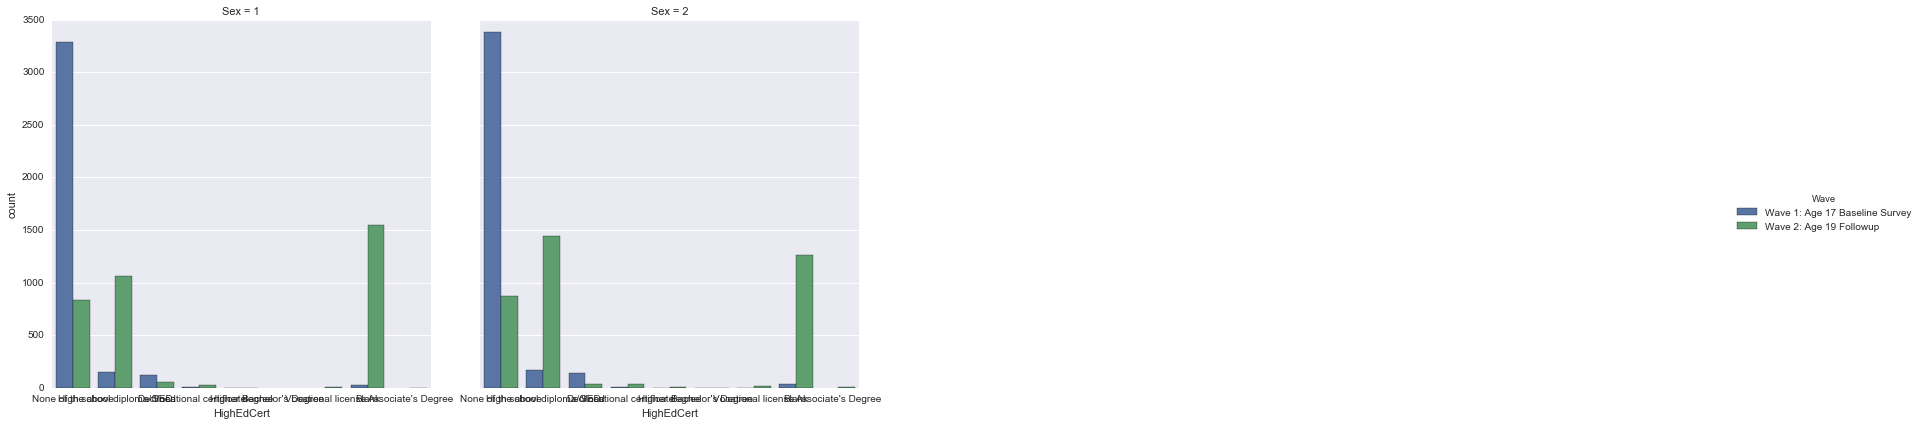

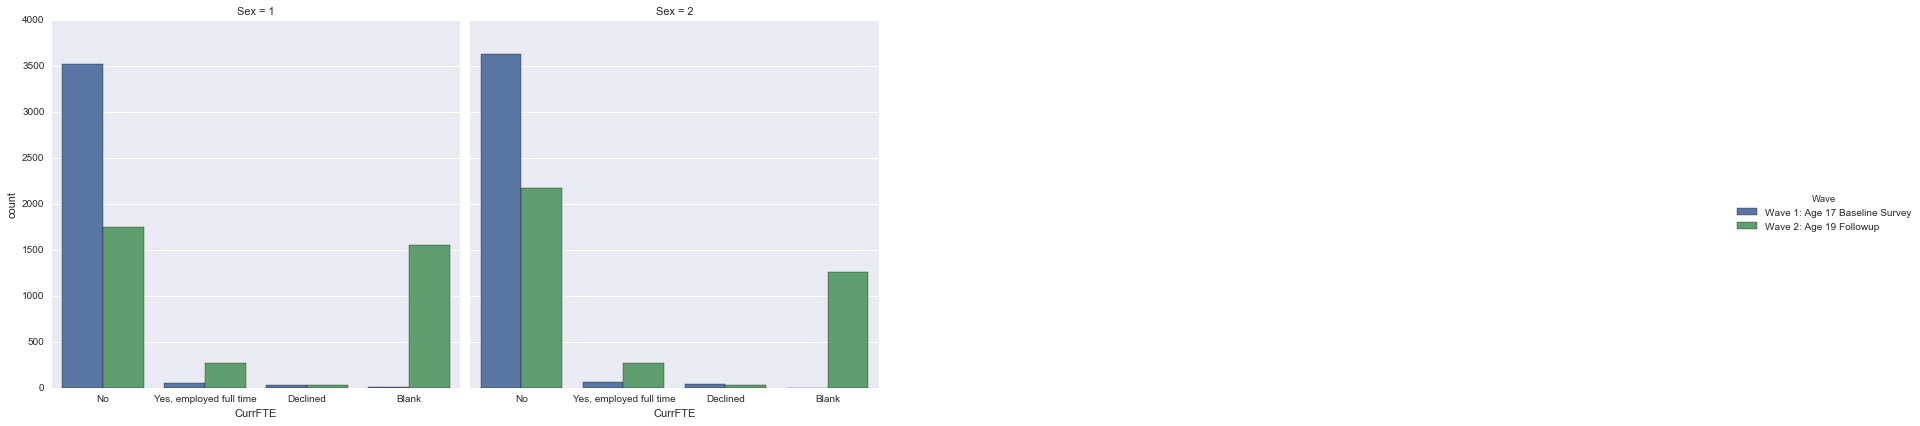

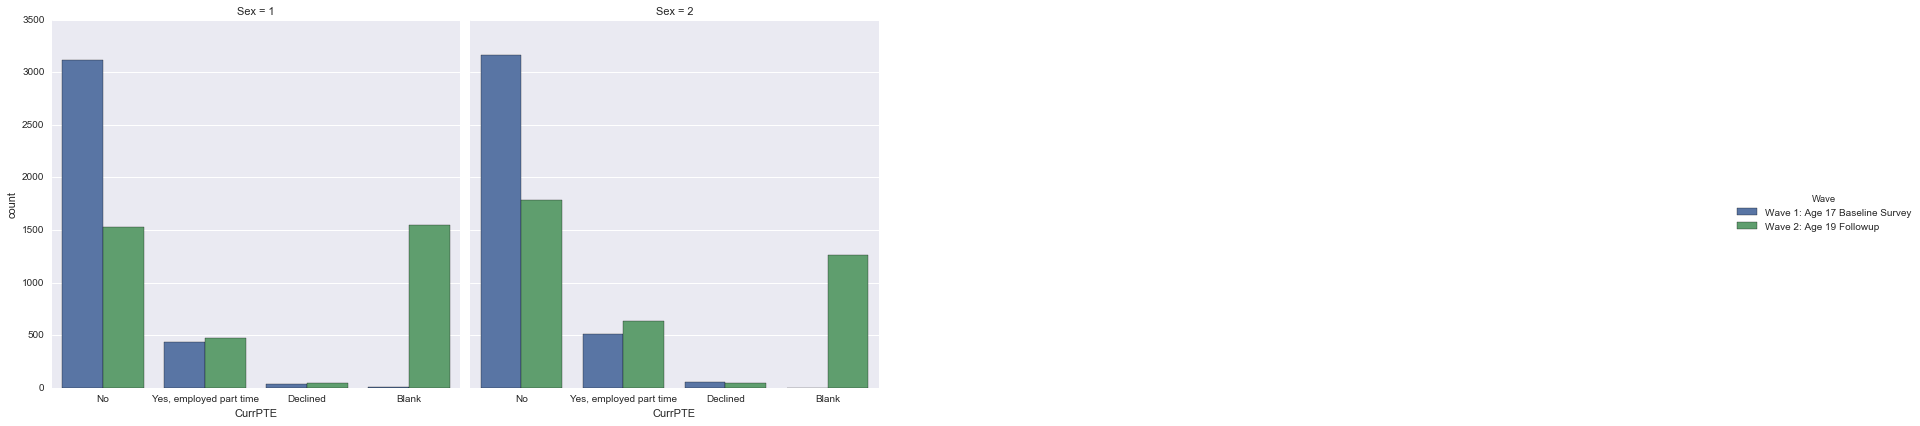

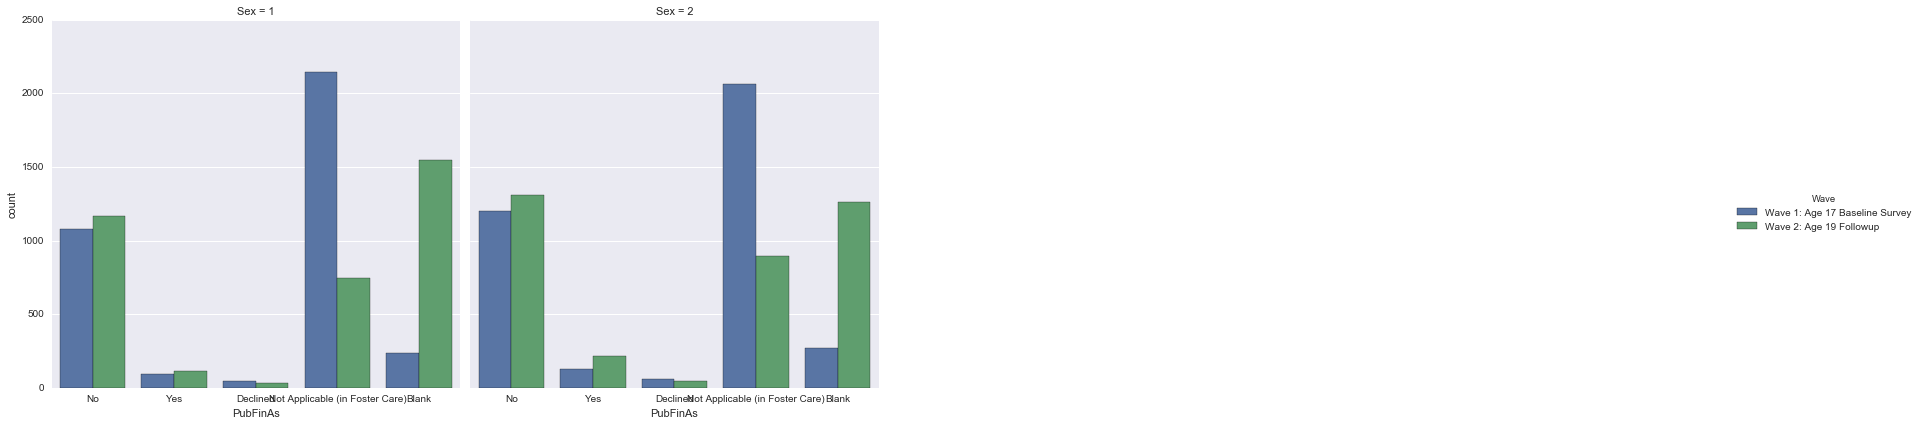

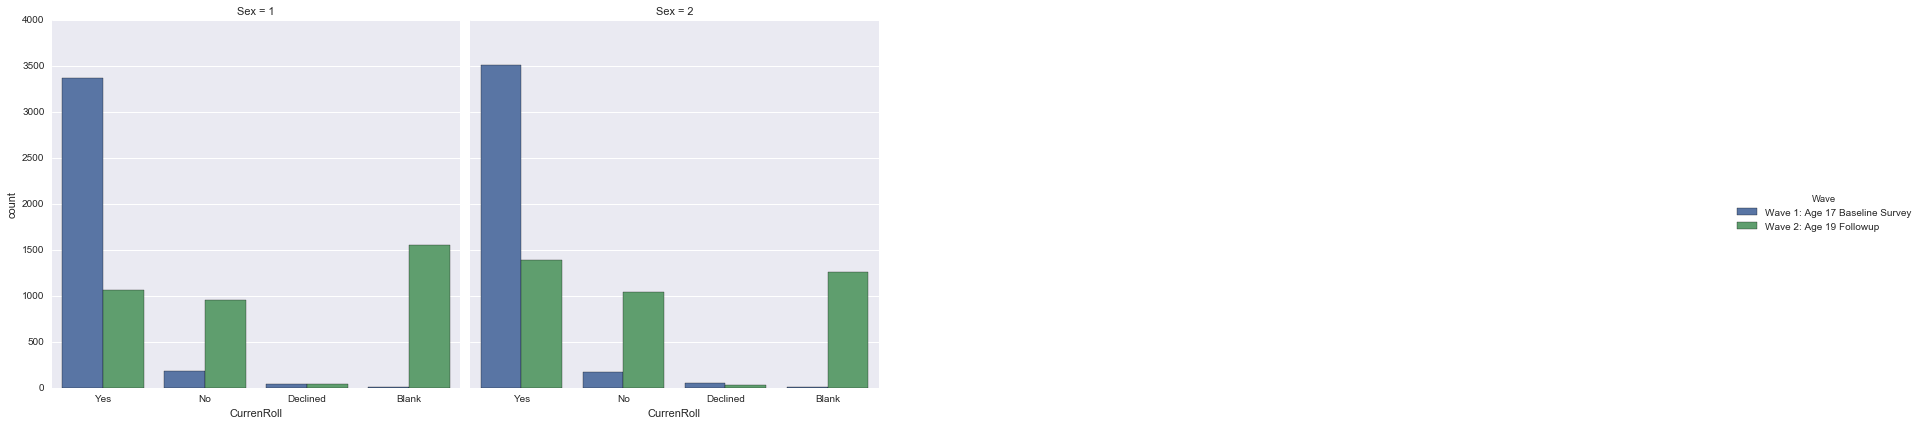

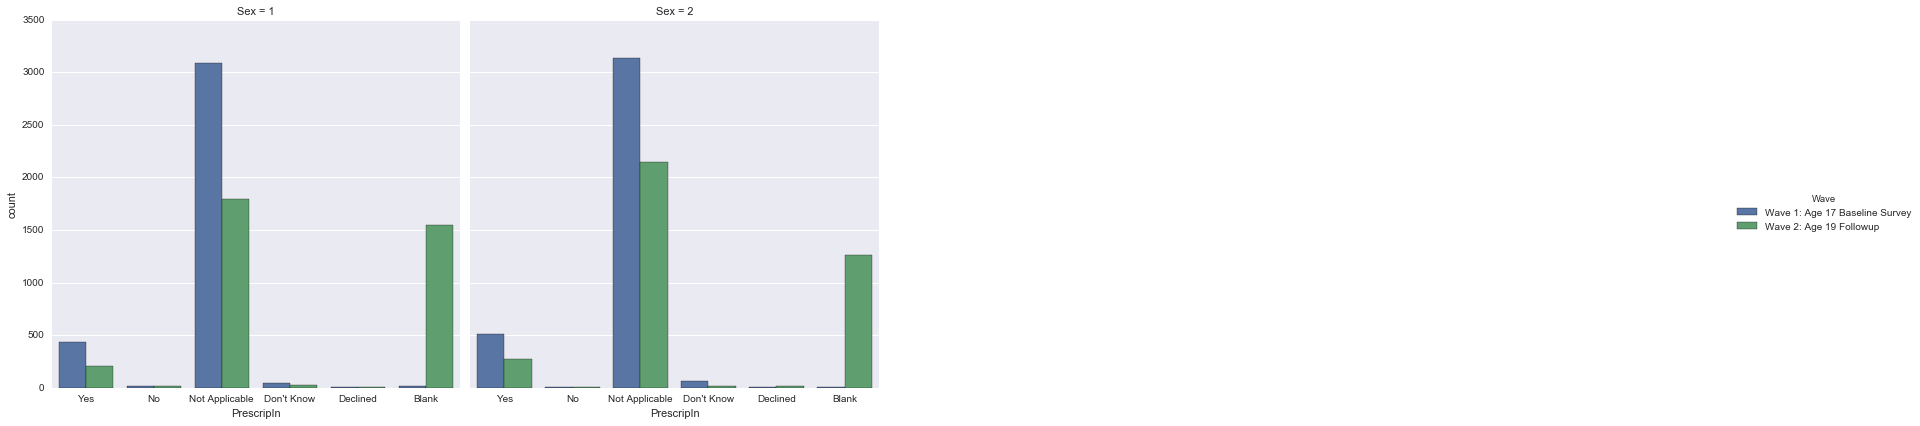

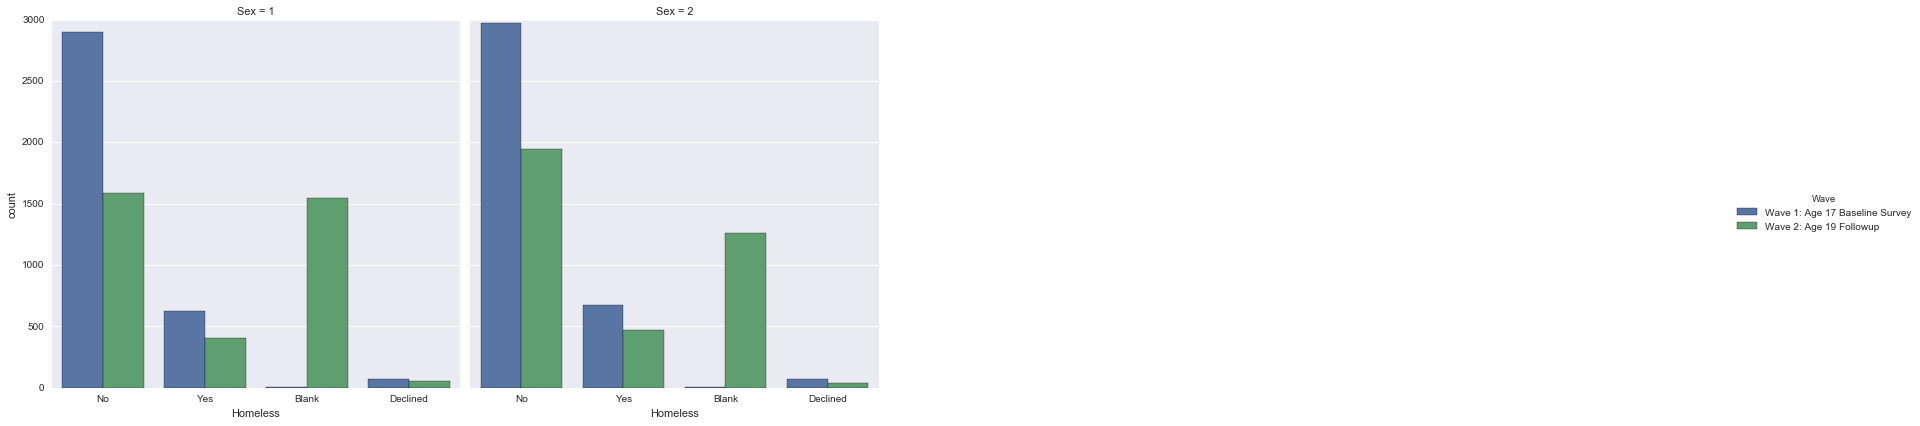

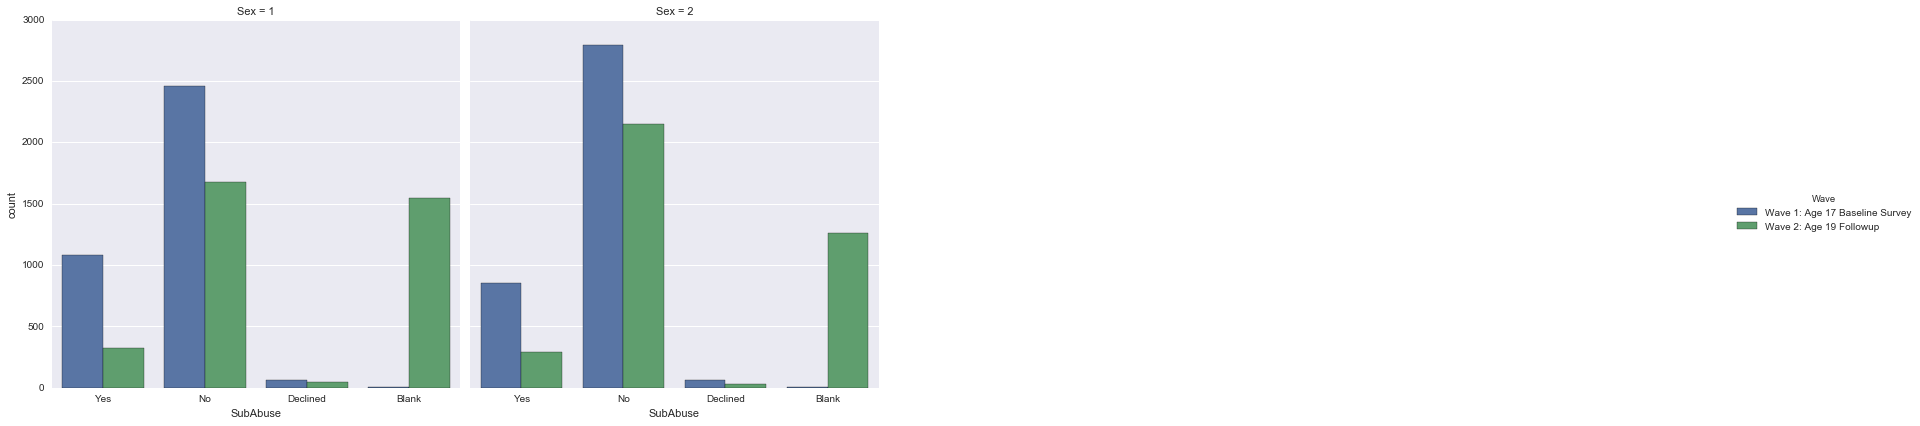

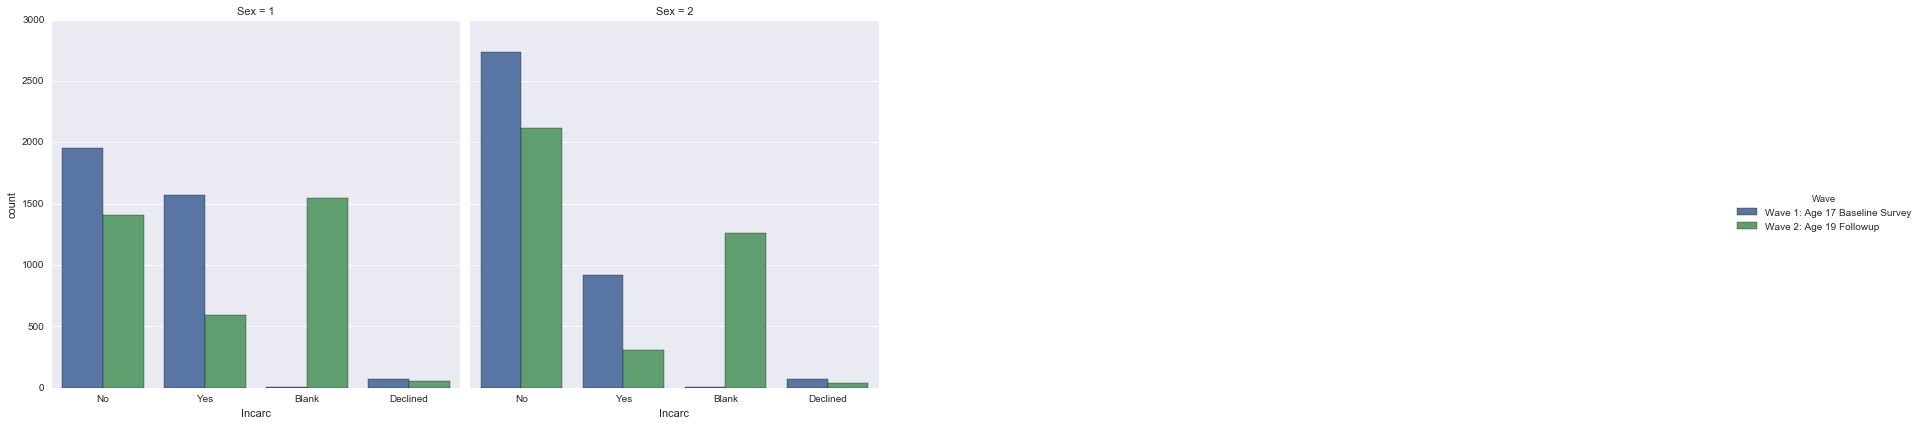

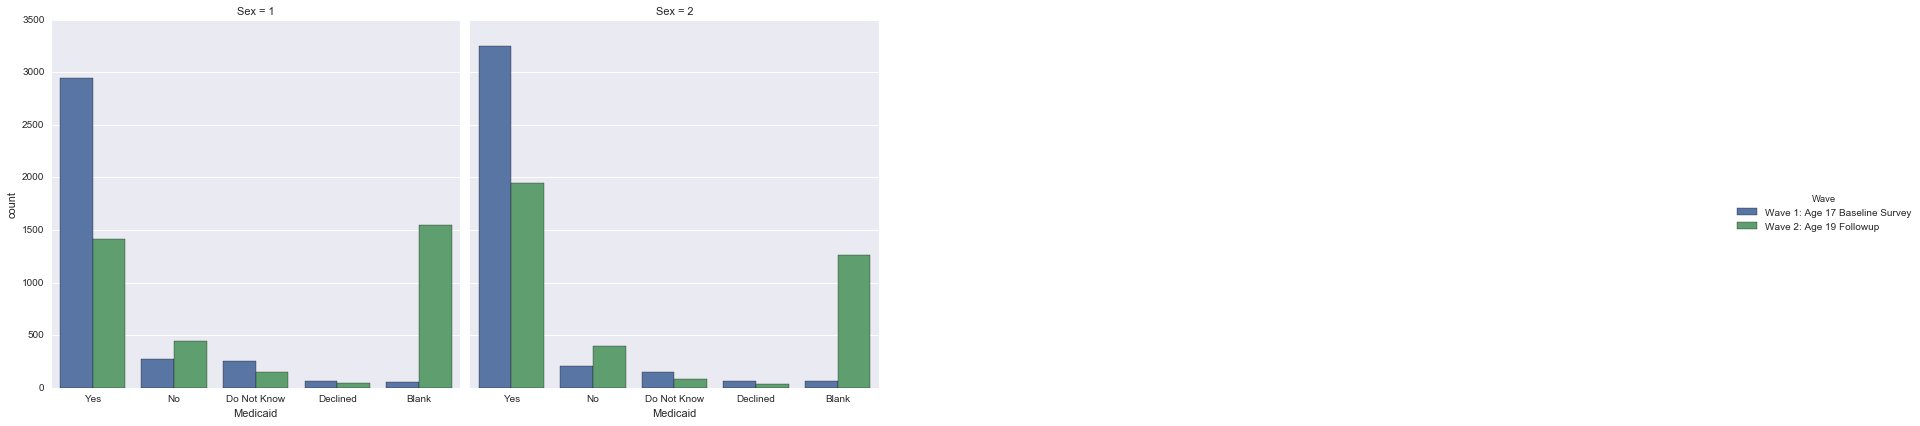

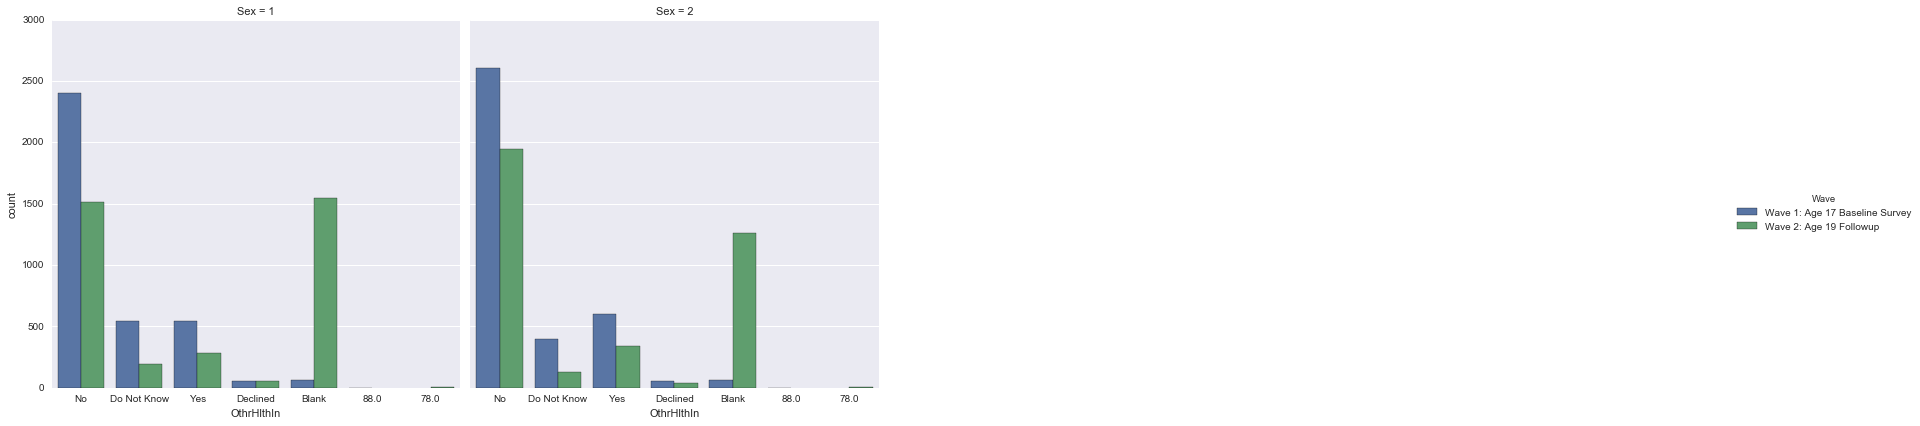

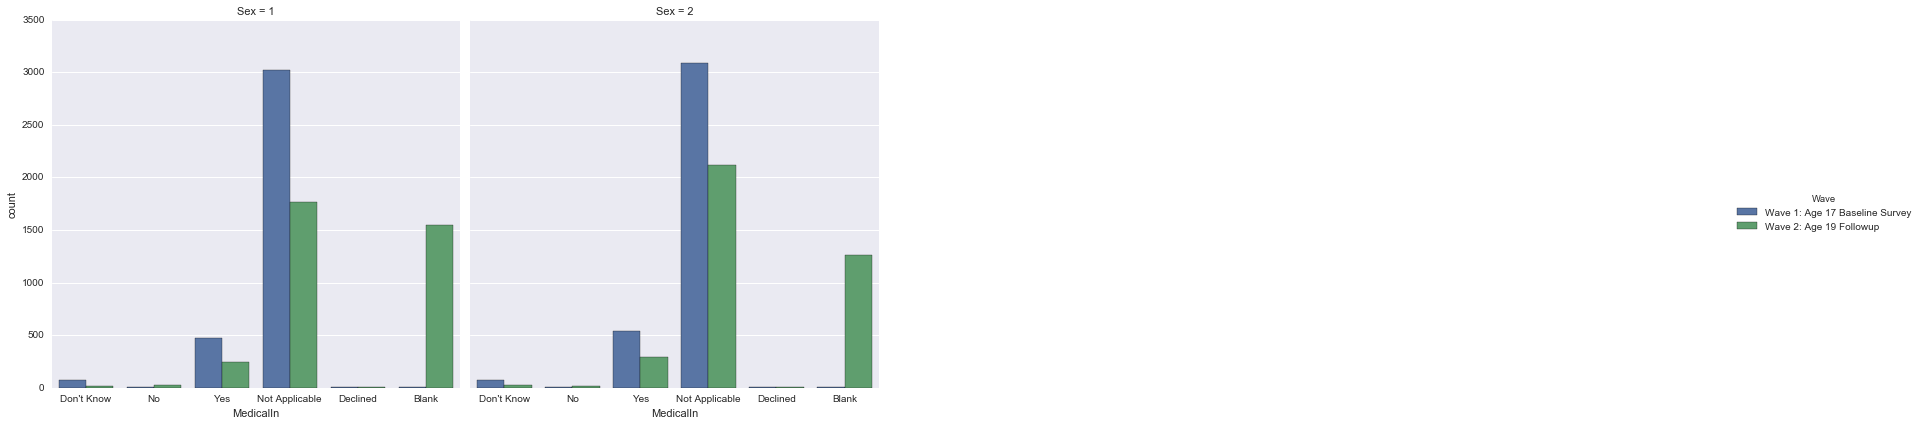

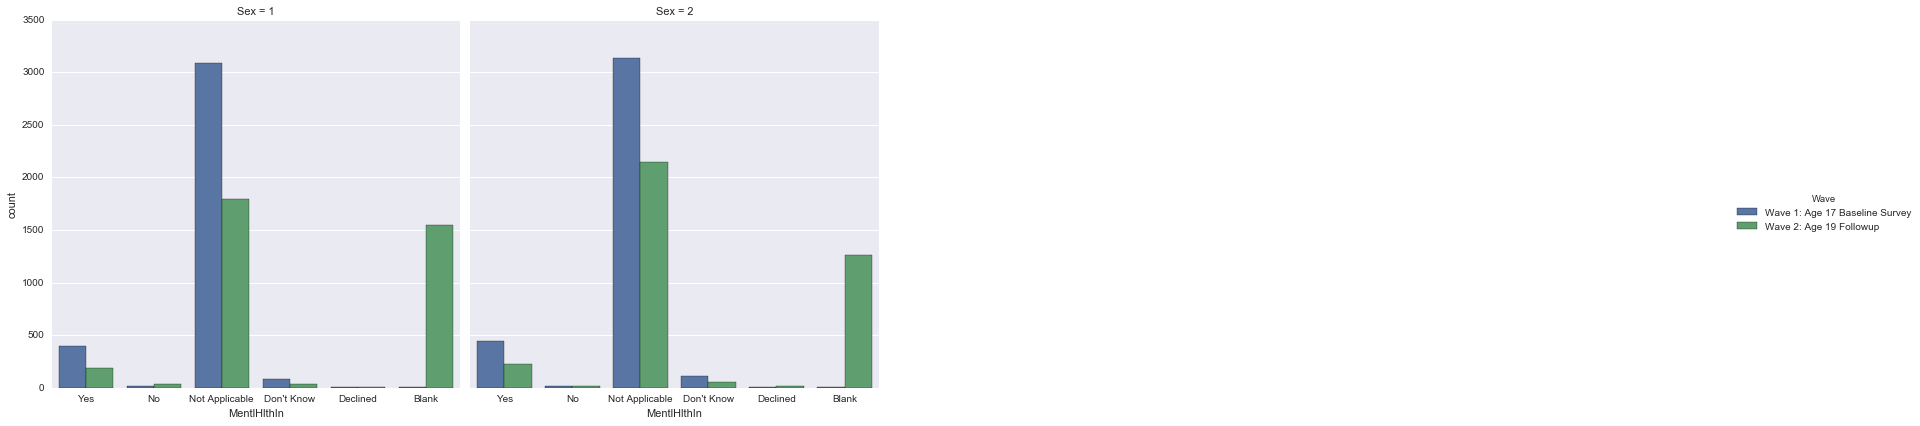

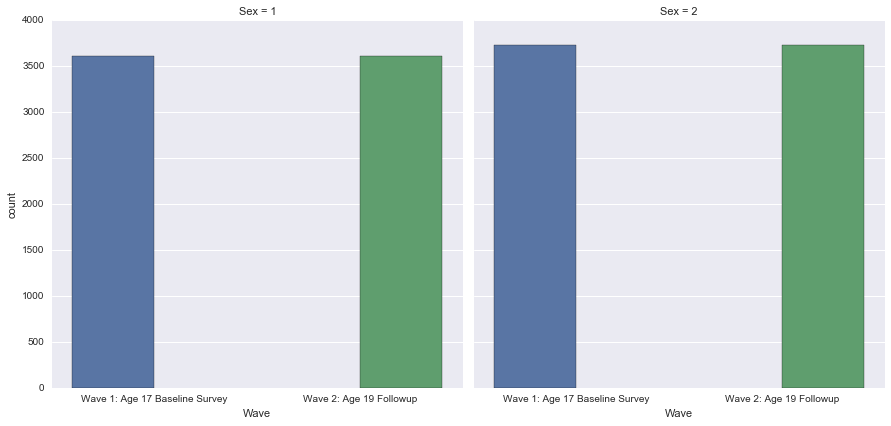

In [33]:
for column in targets:

    sns.factorplot(column, col="Sex", col_wrap=4, data=cohort_1_w1w2, kind="count", size=6, aspect=1, hue="Wave")

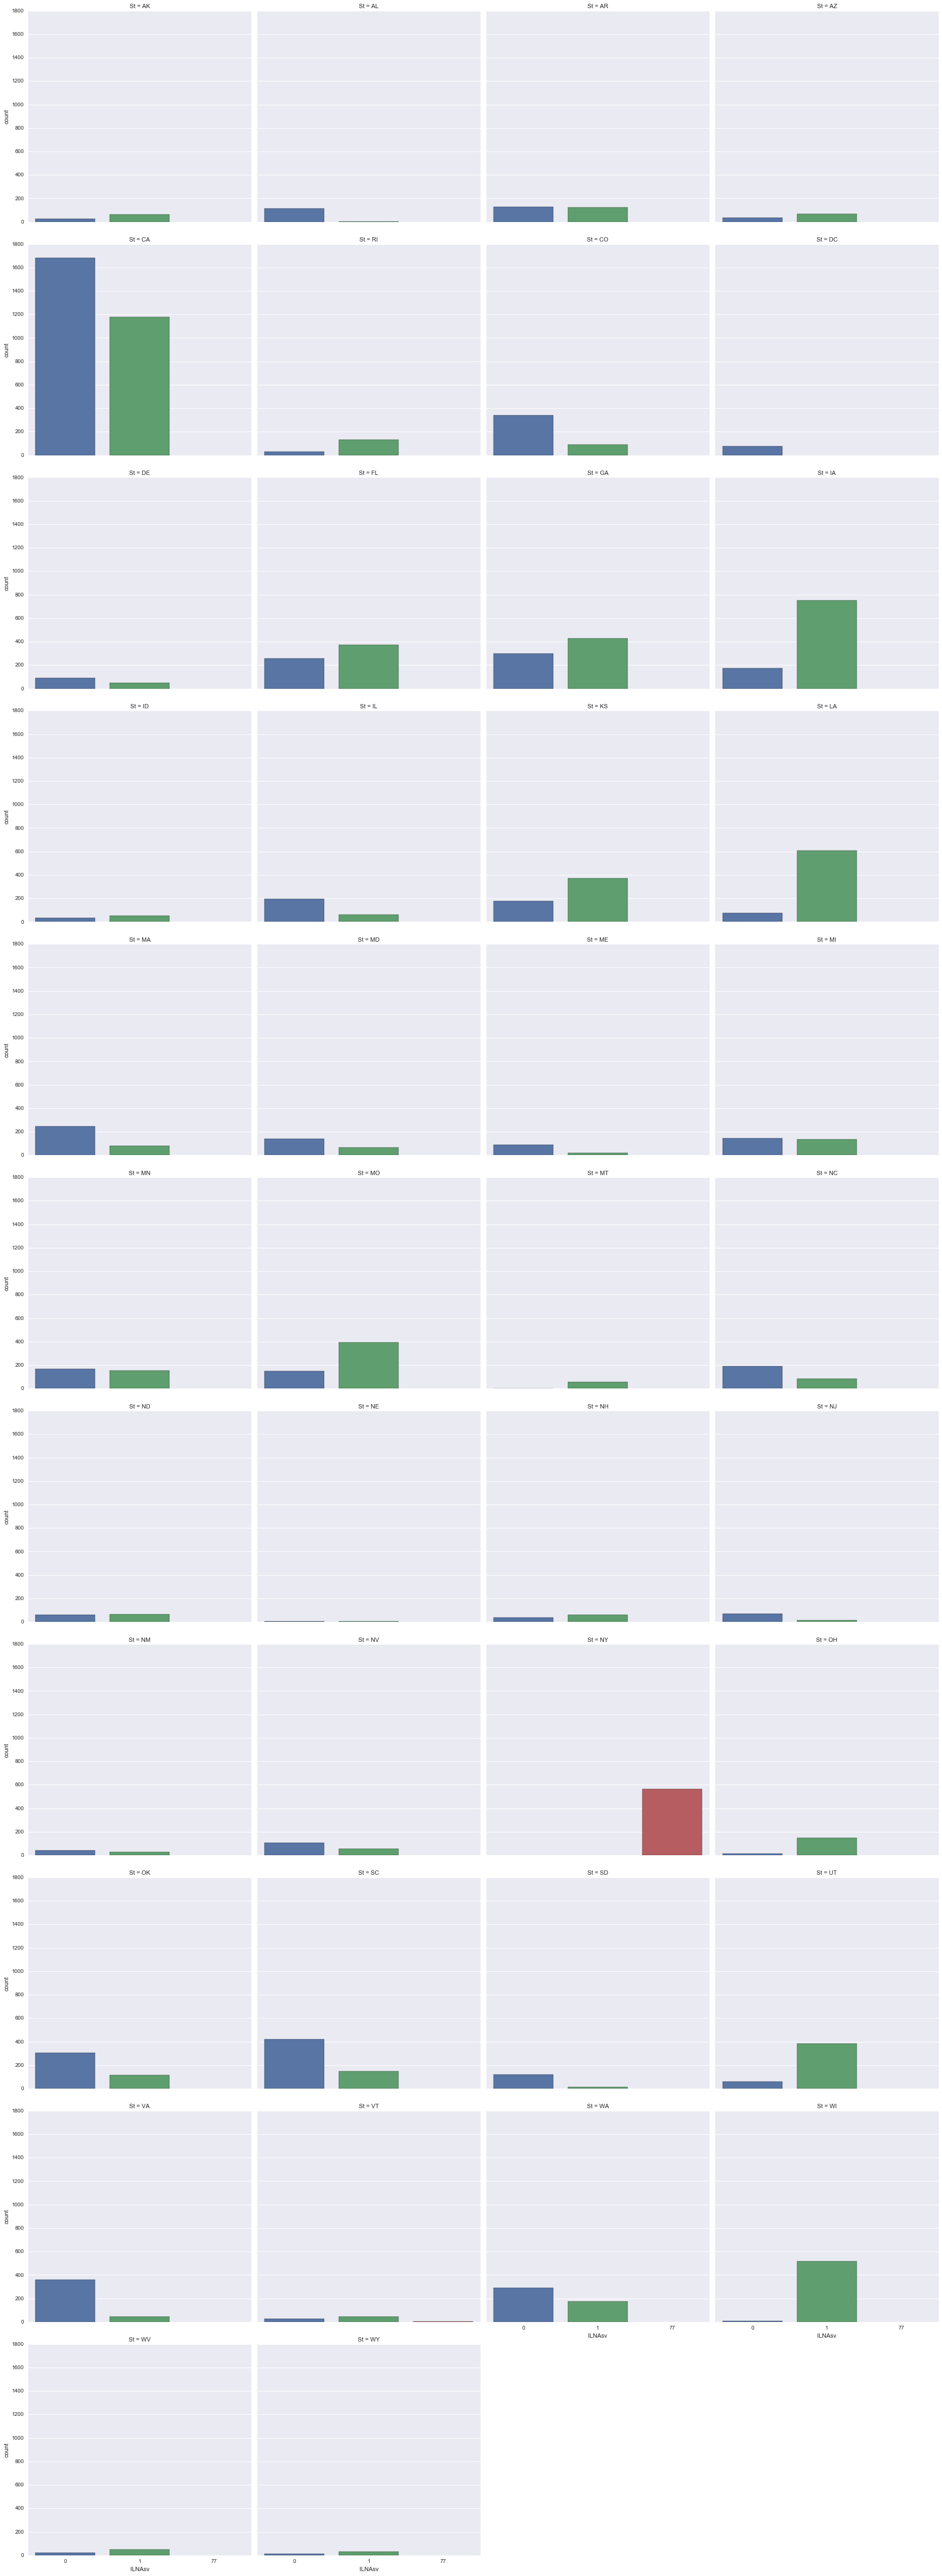

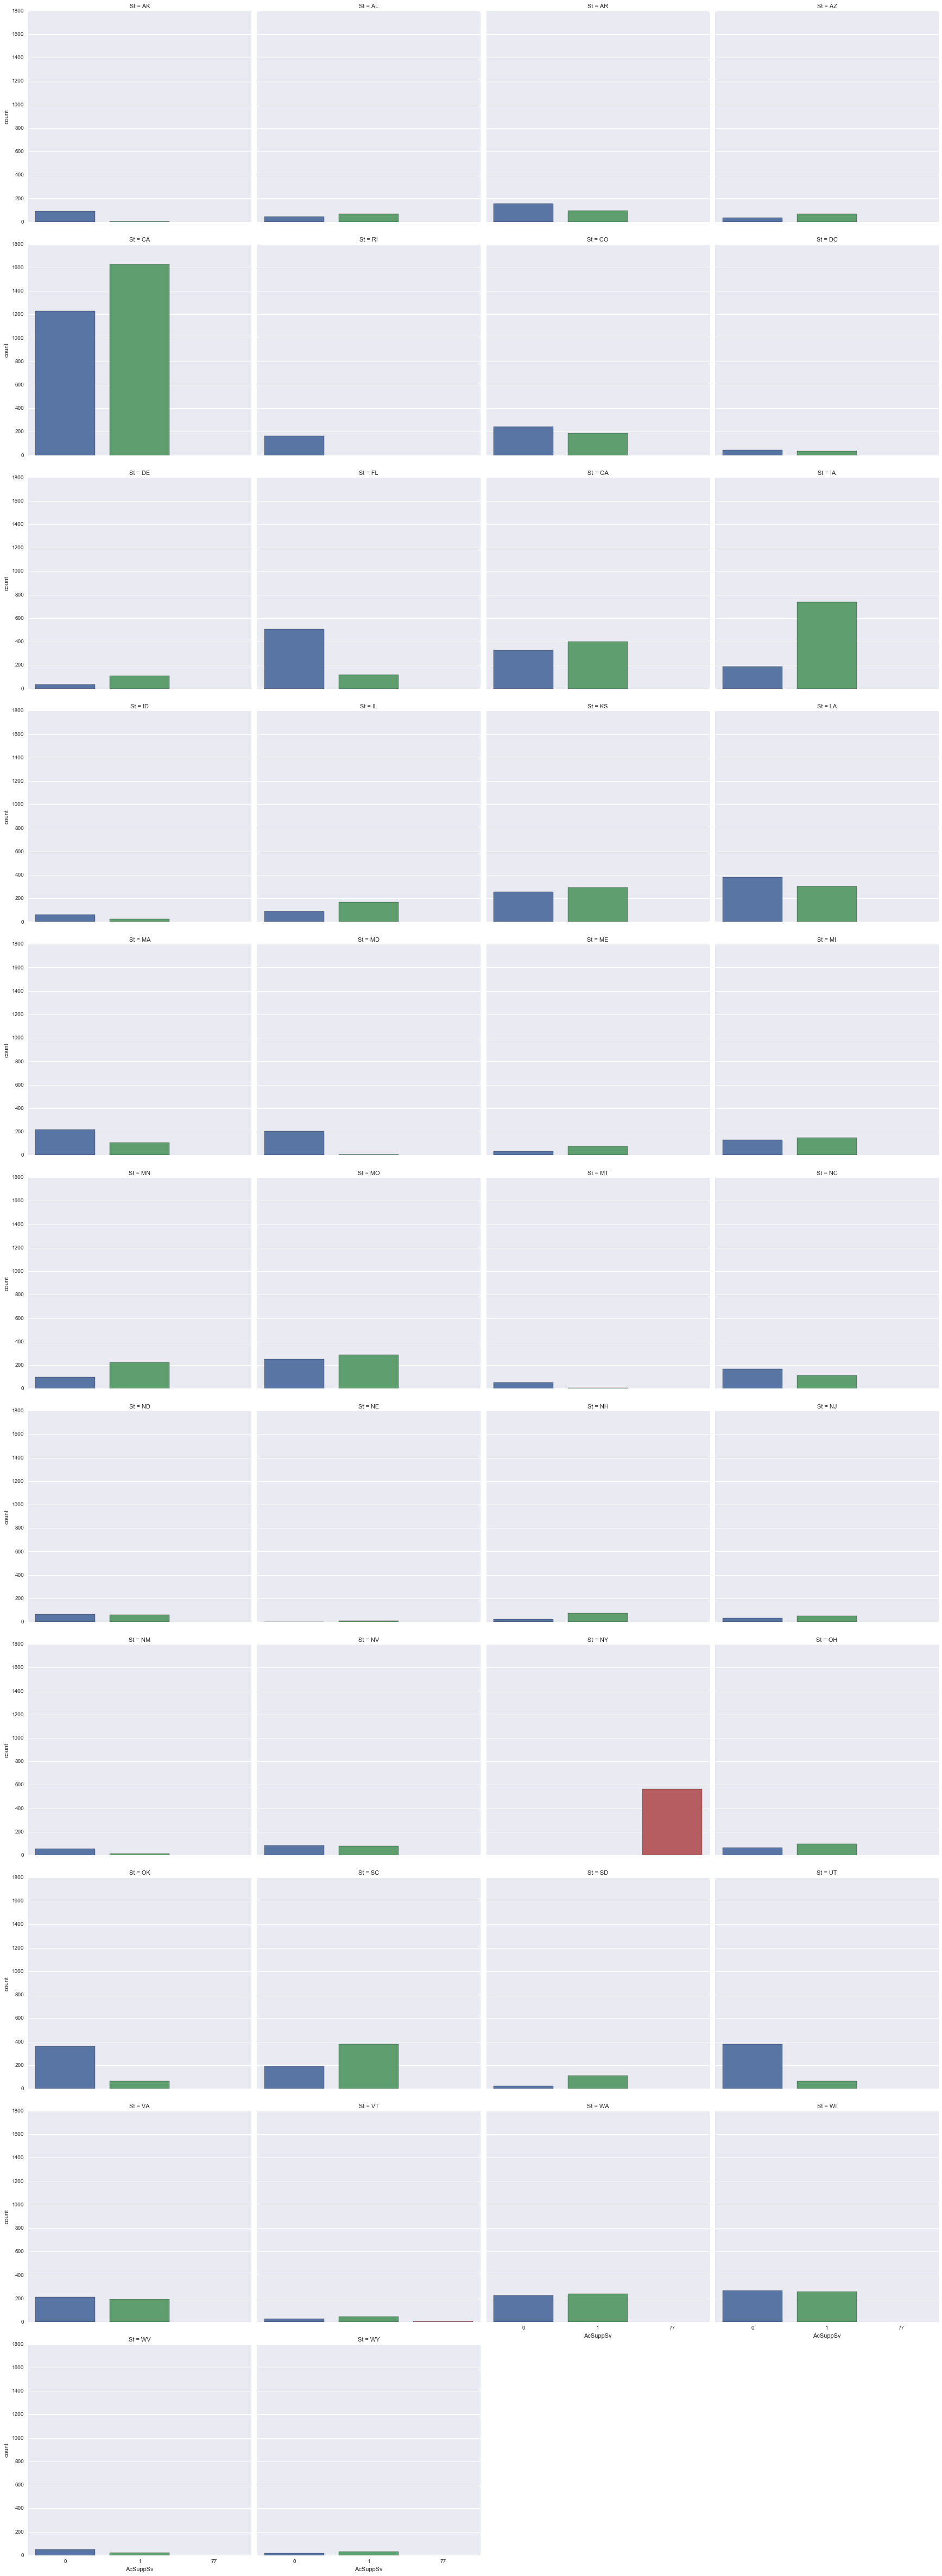

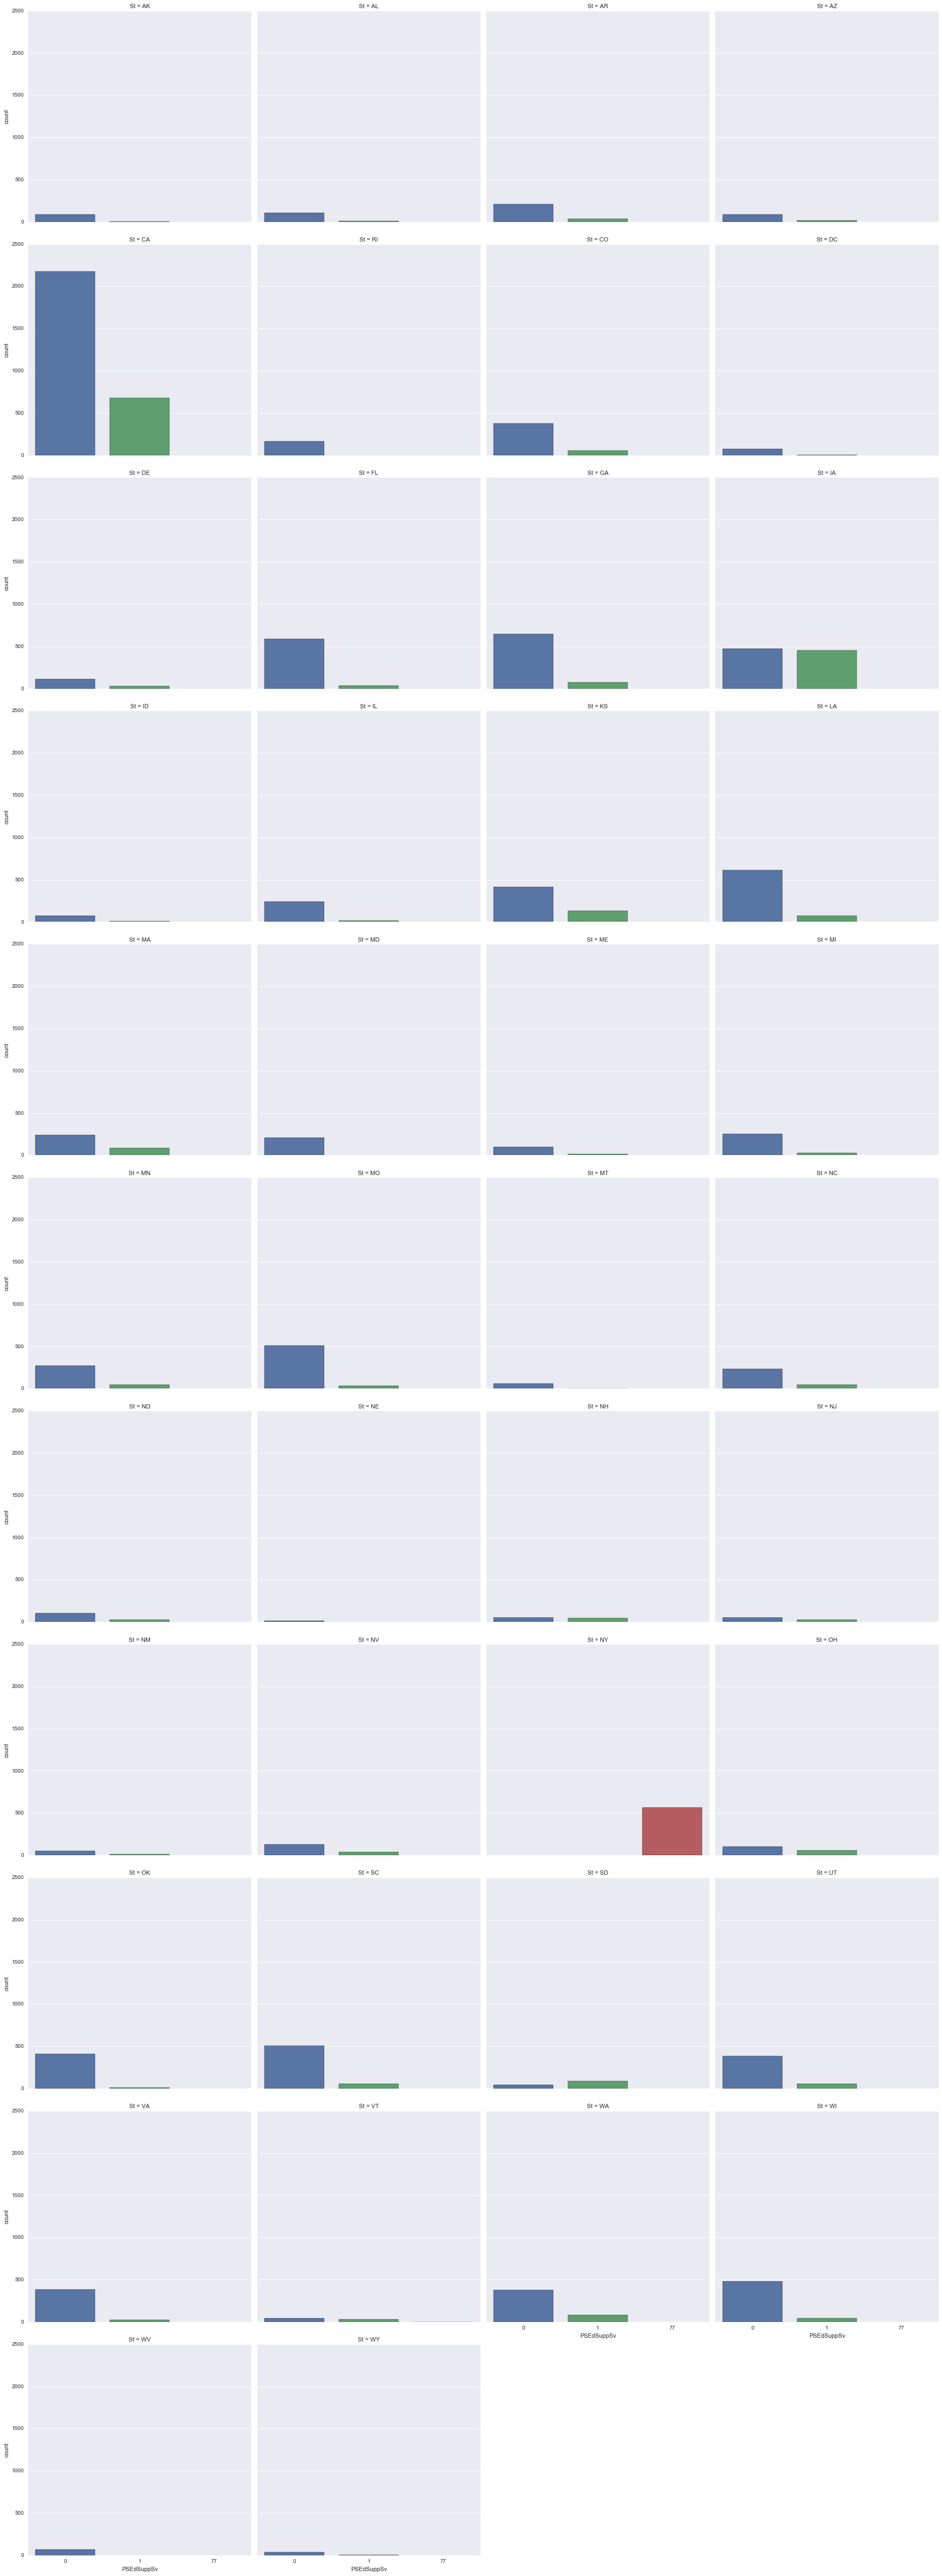

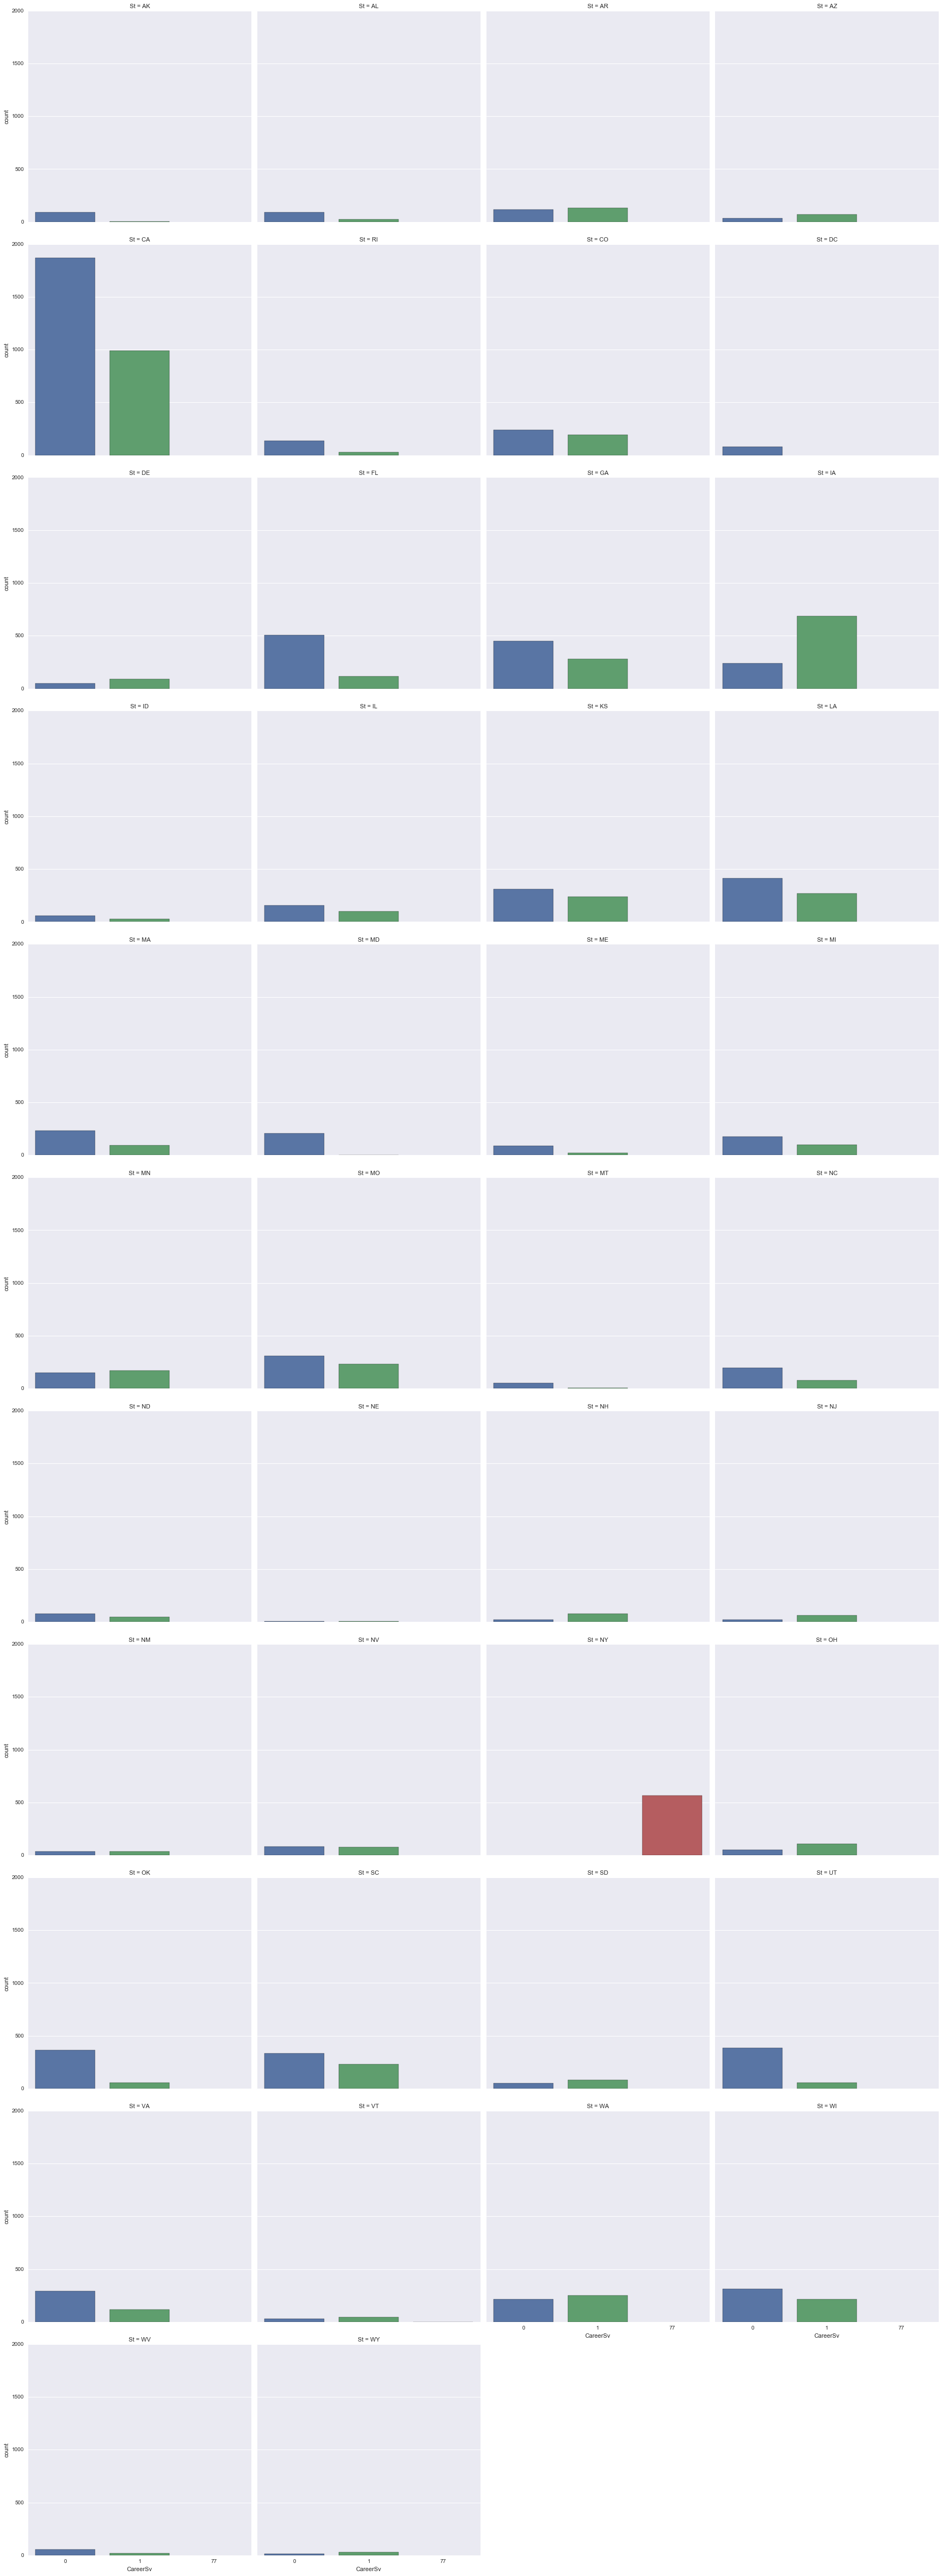

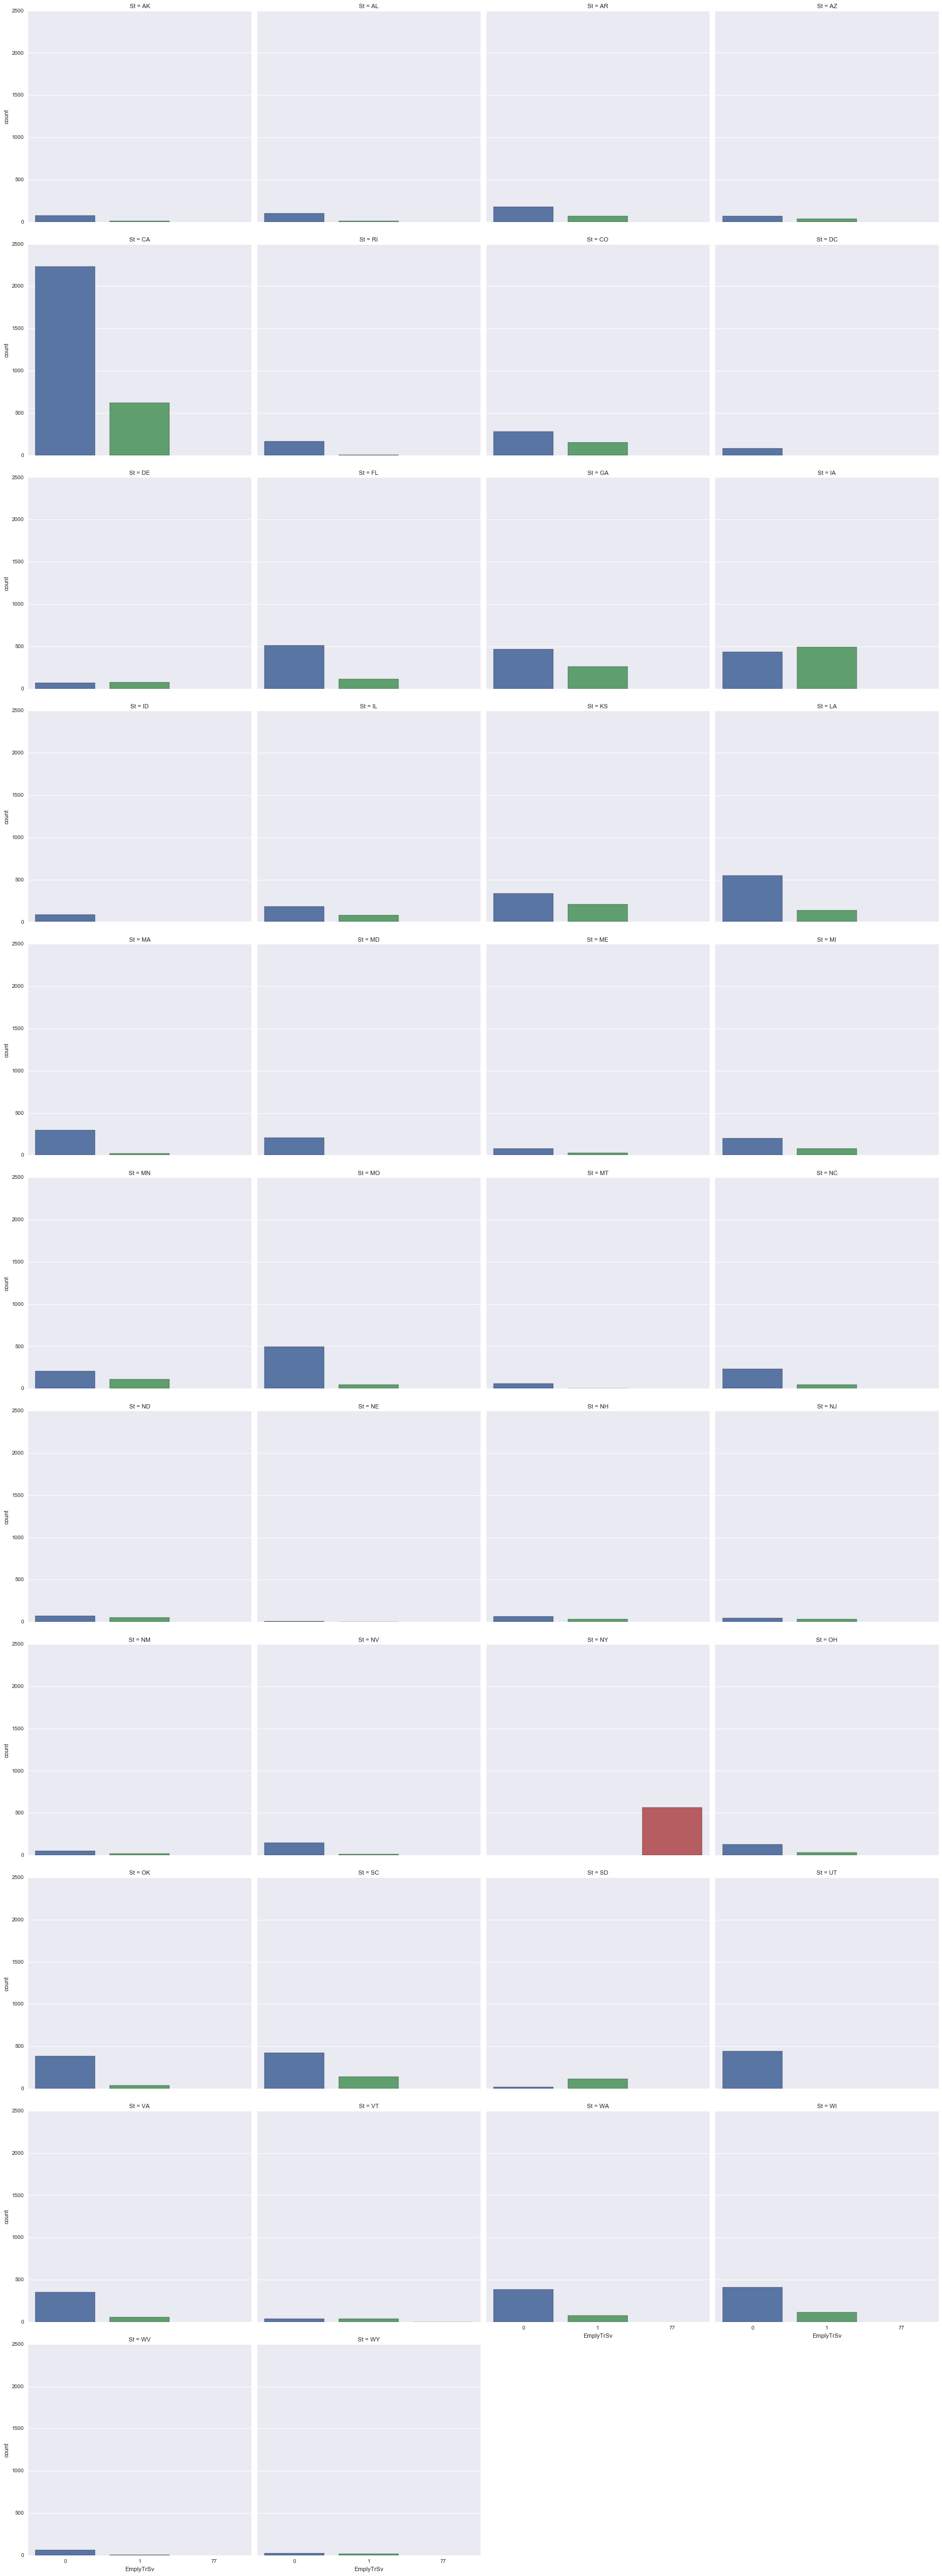

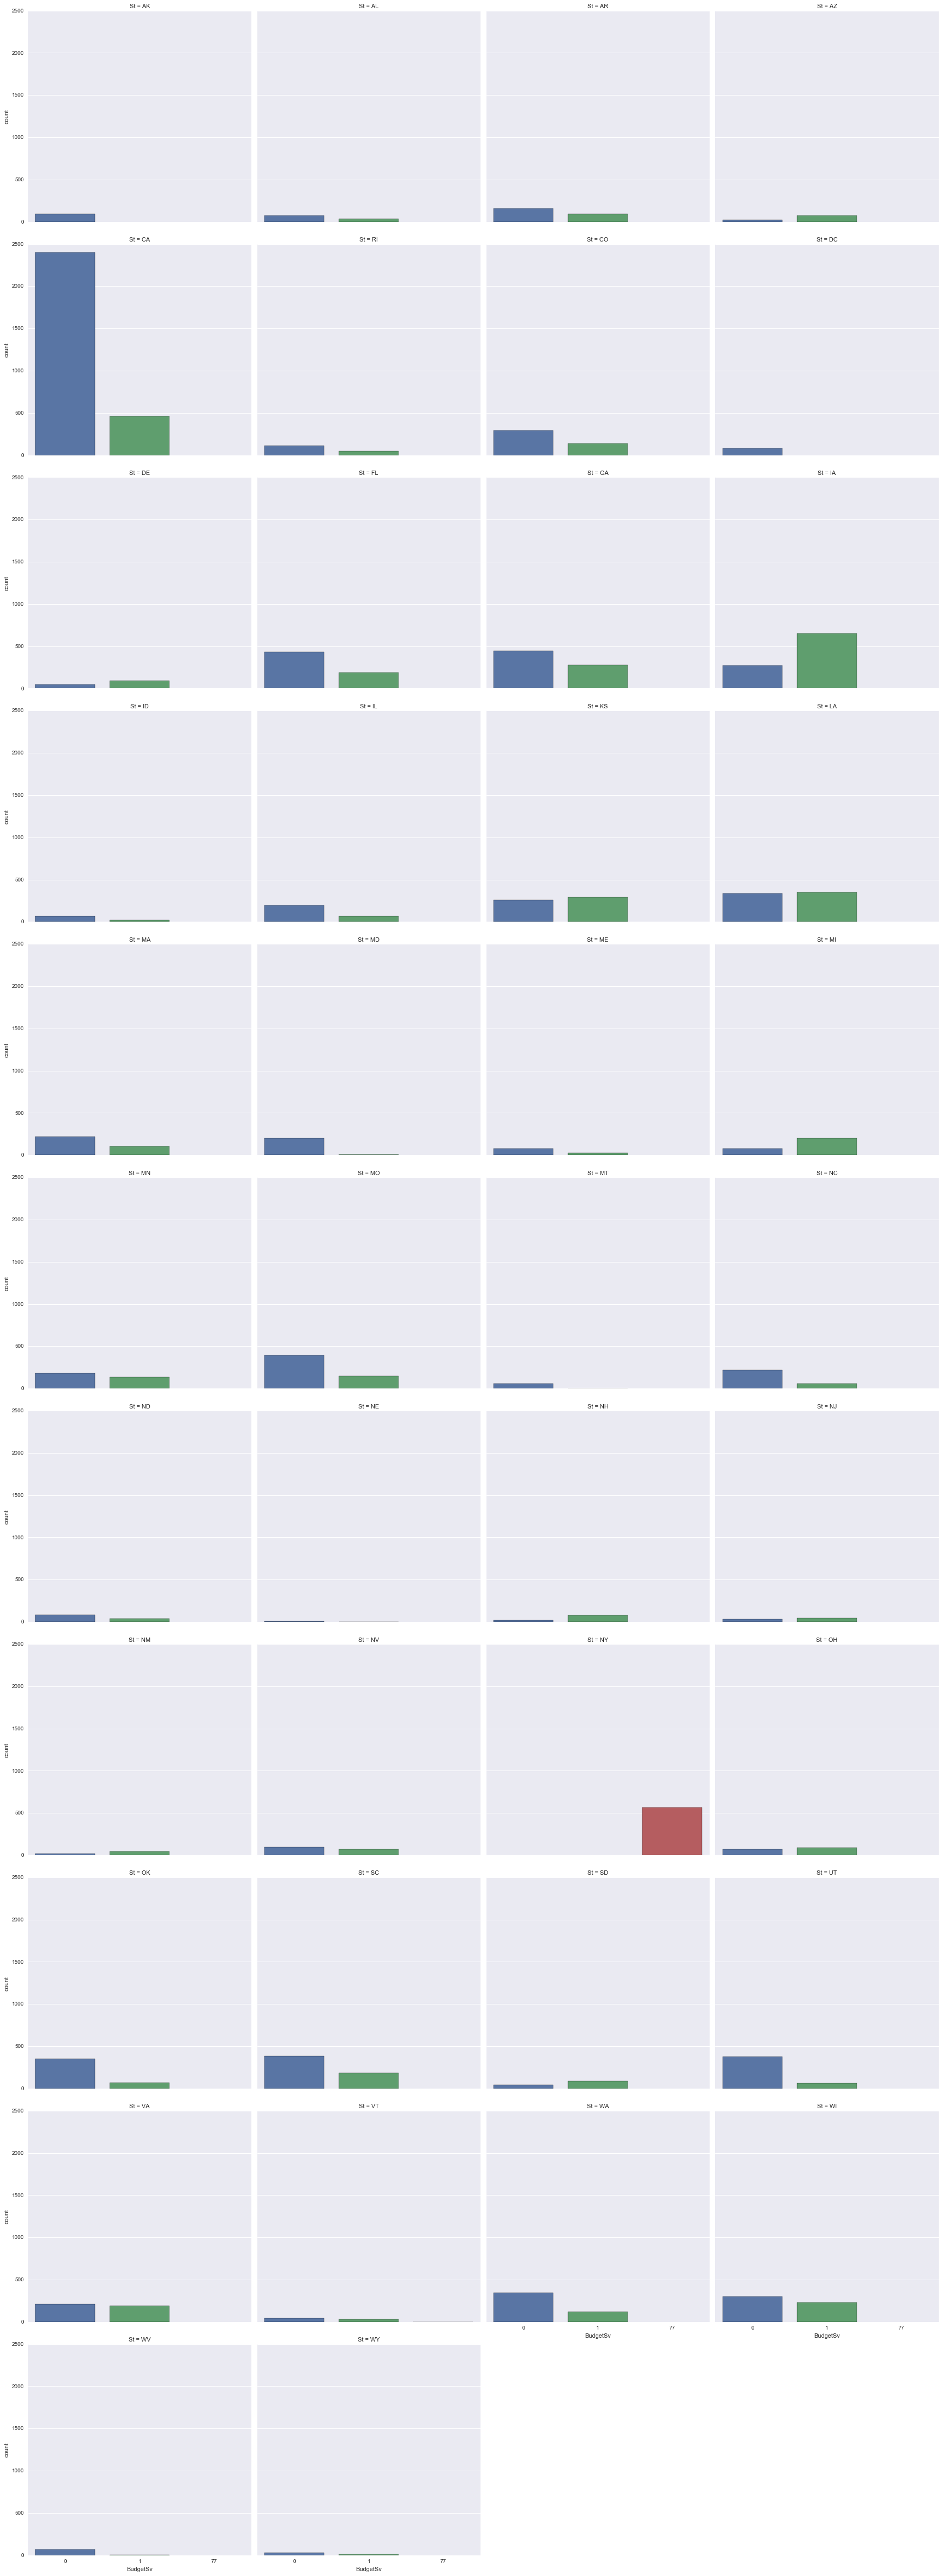

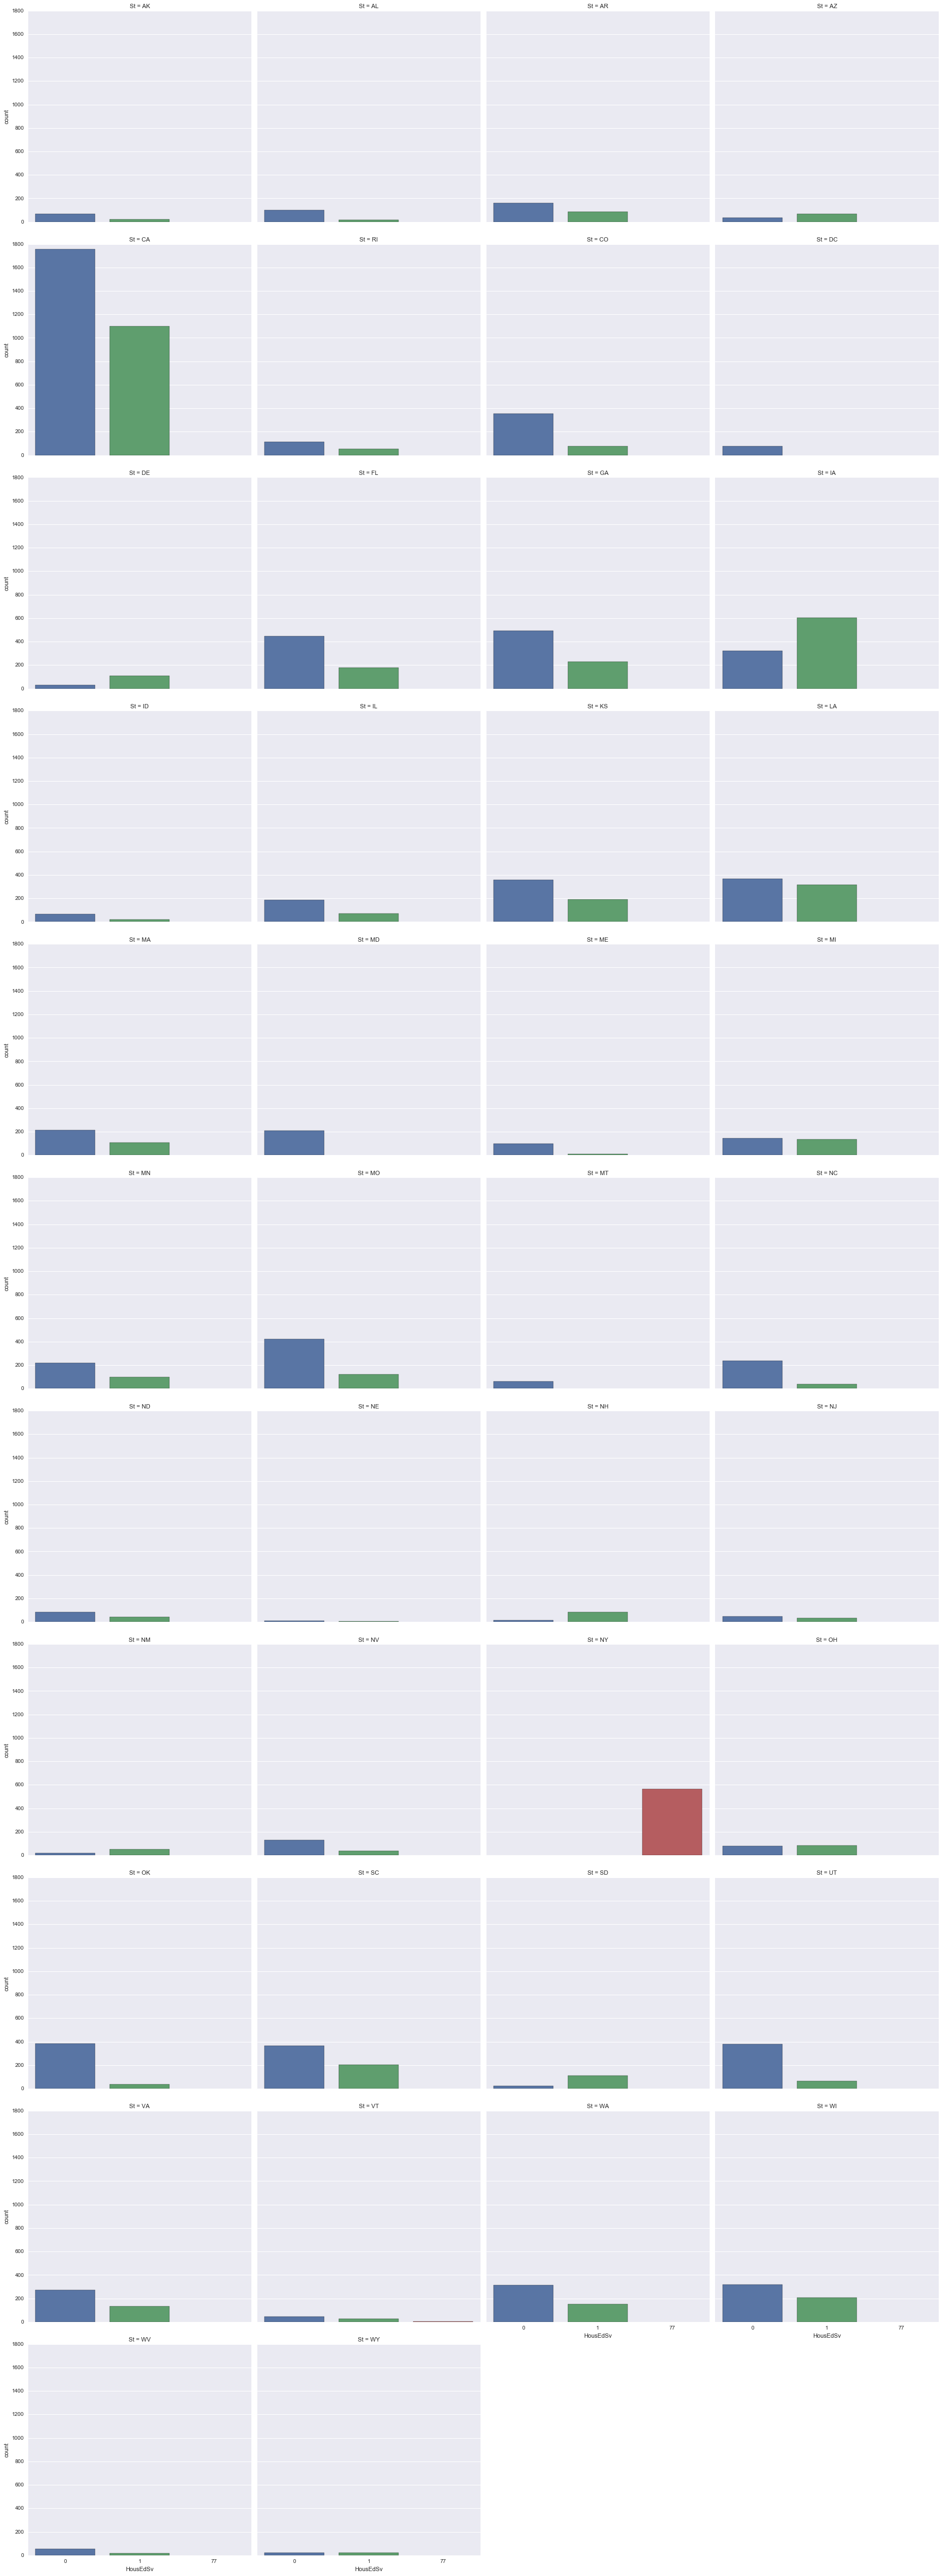

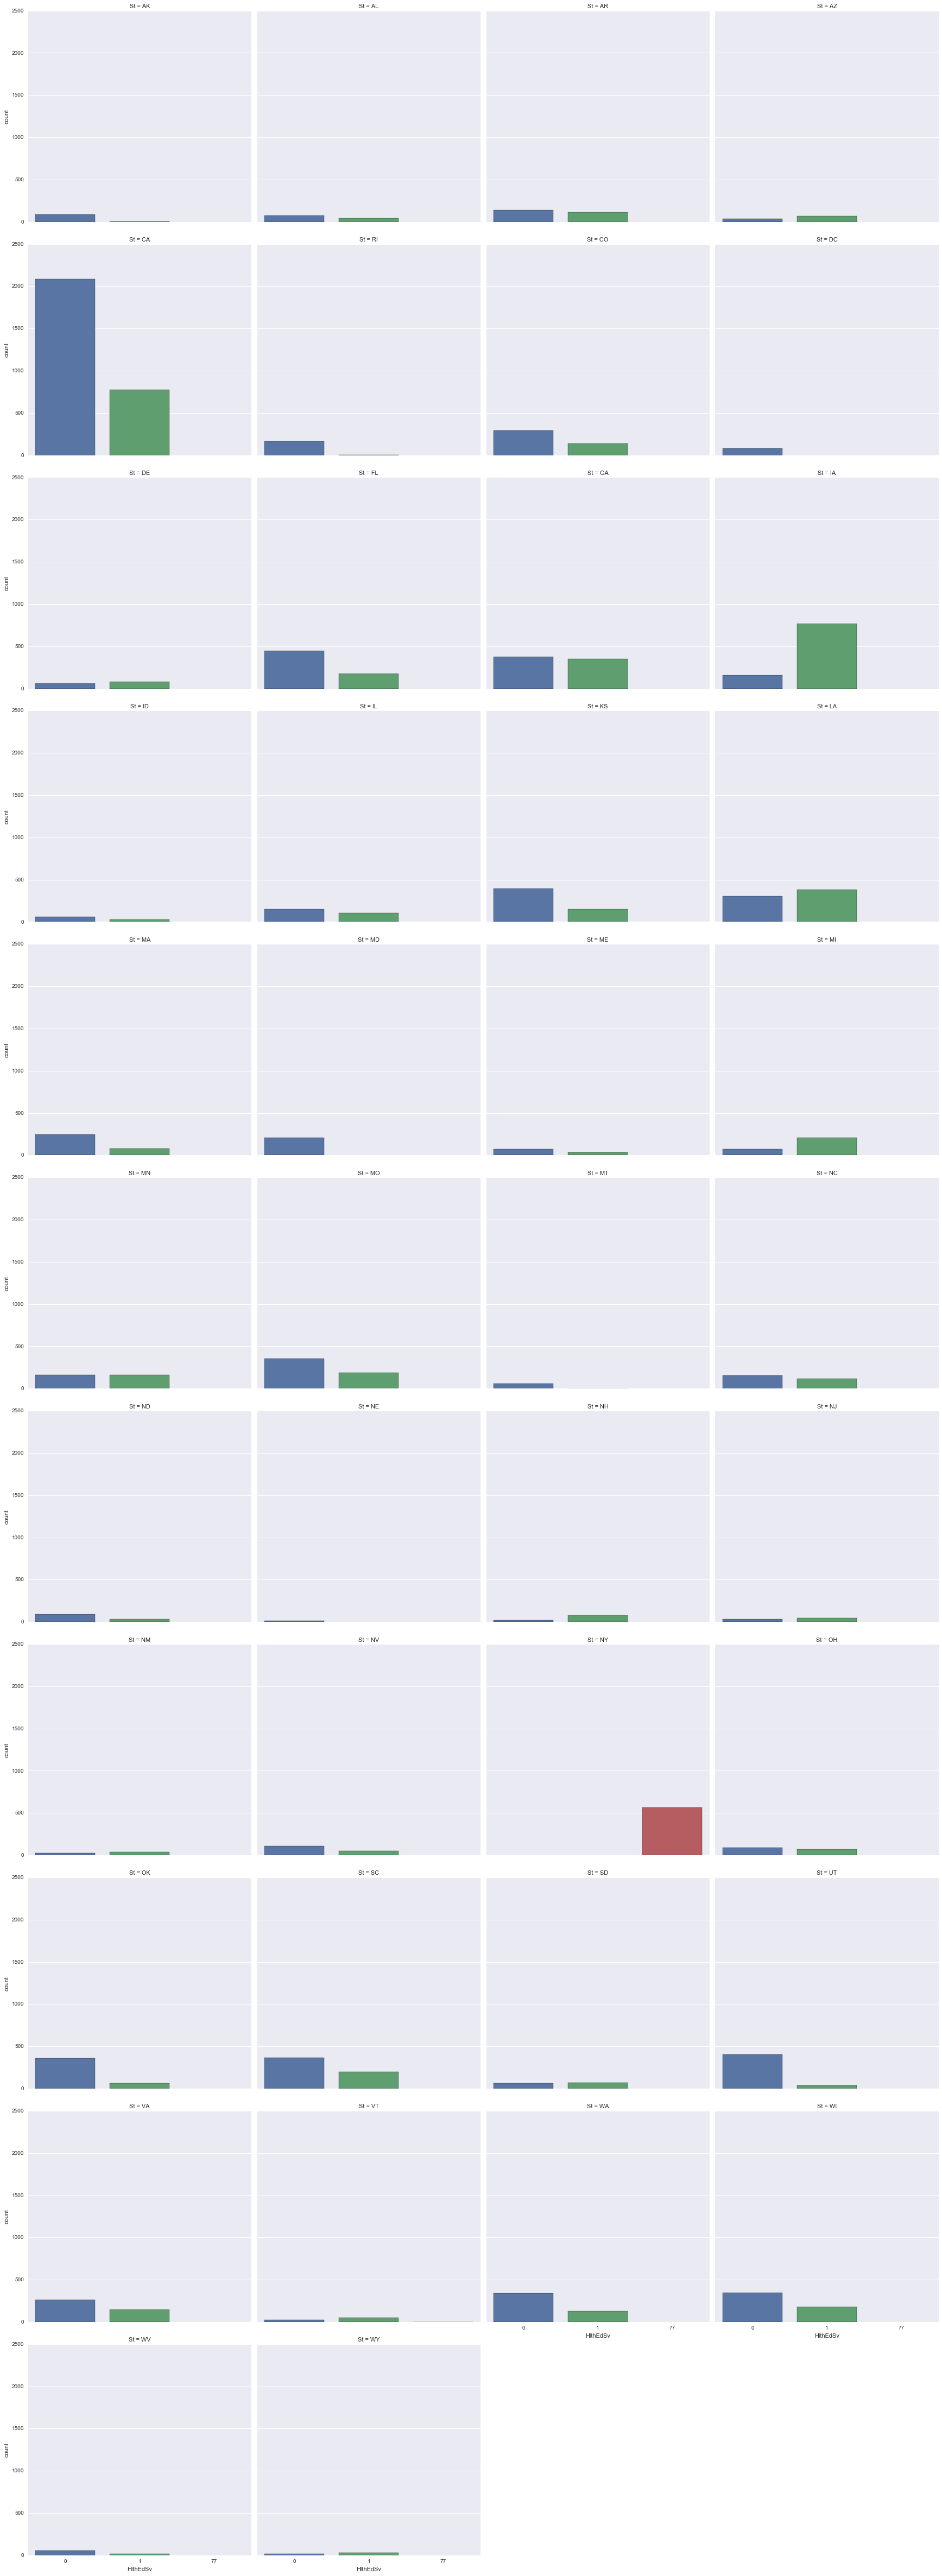

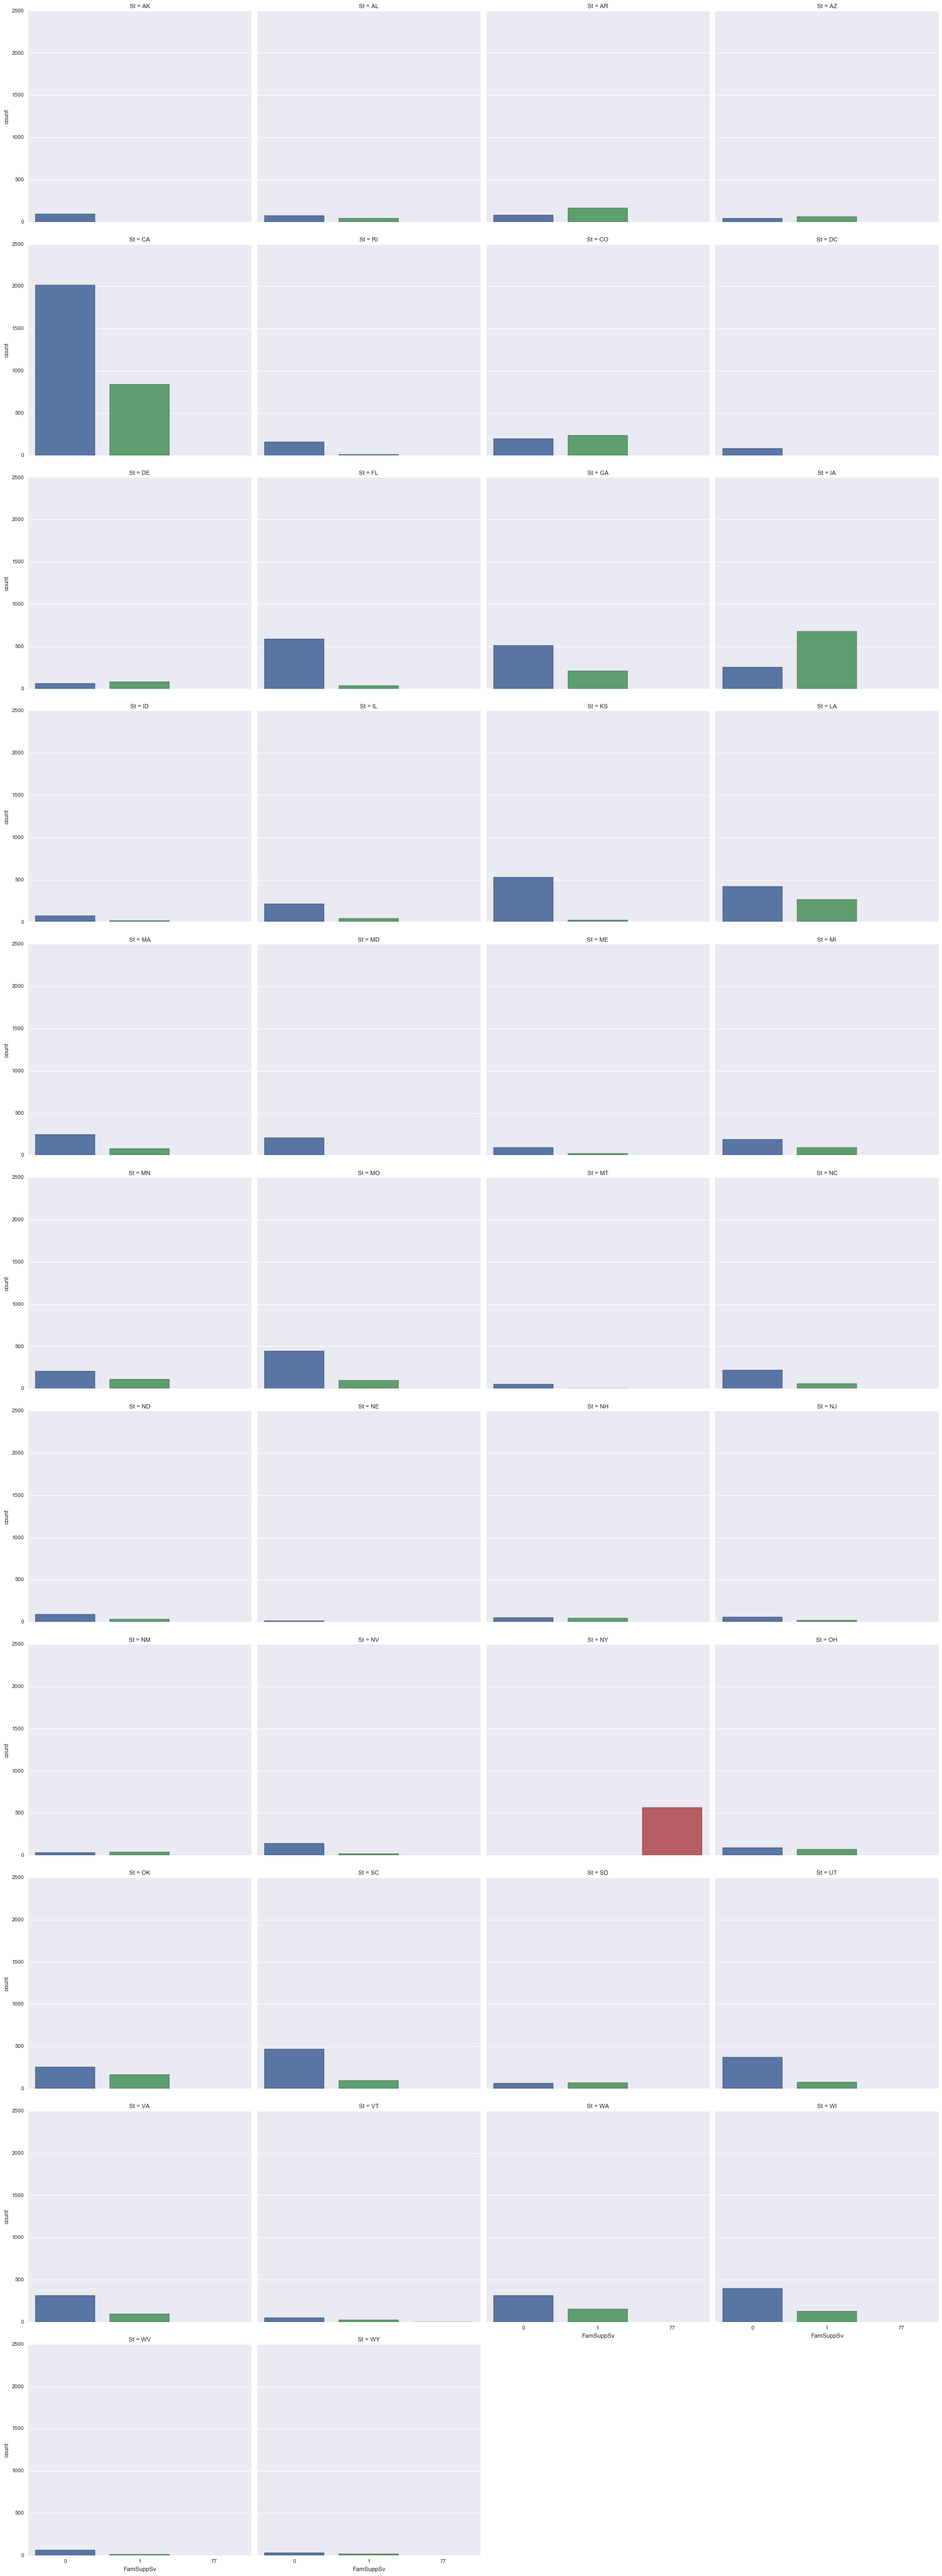

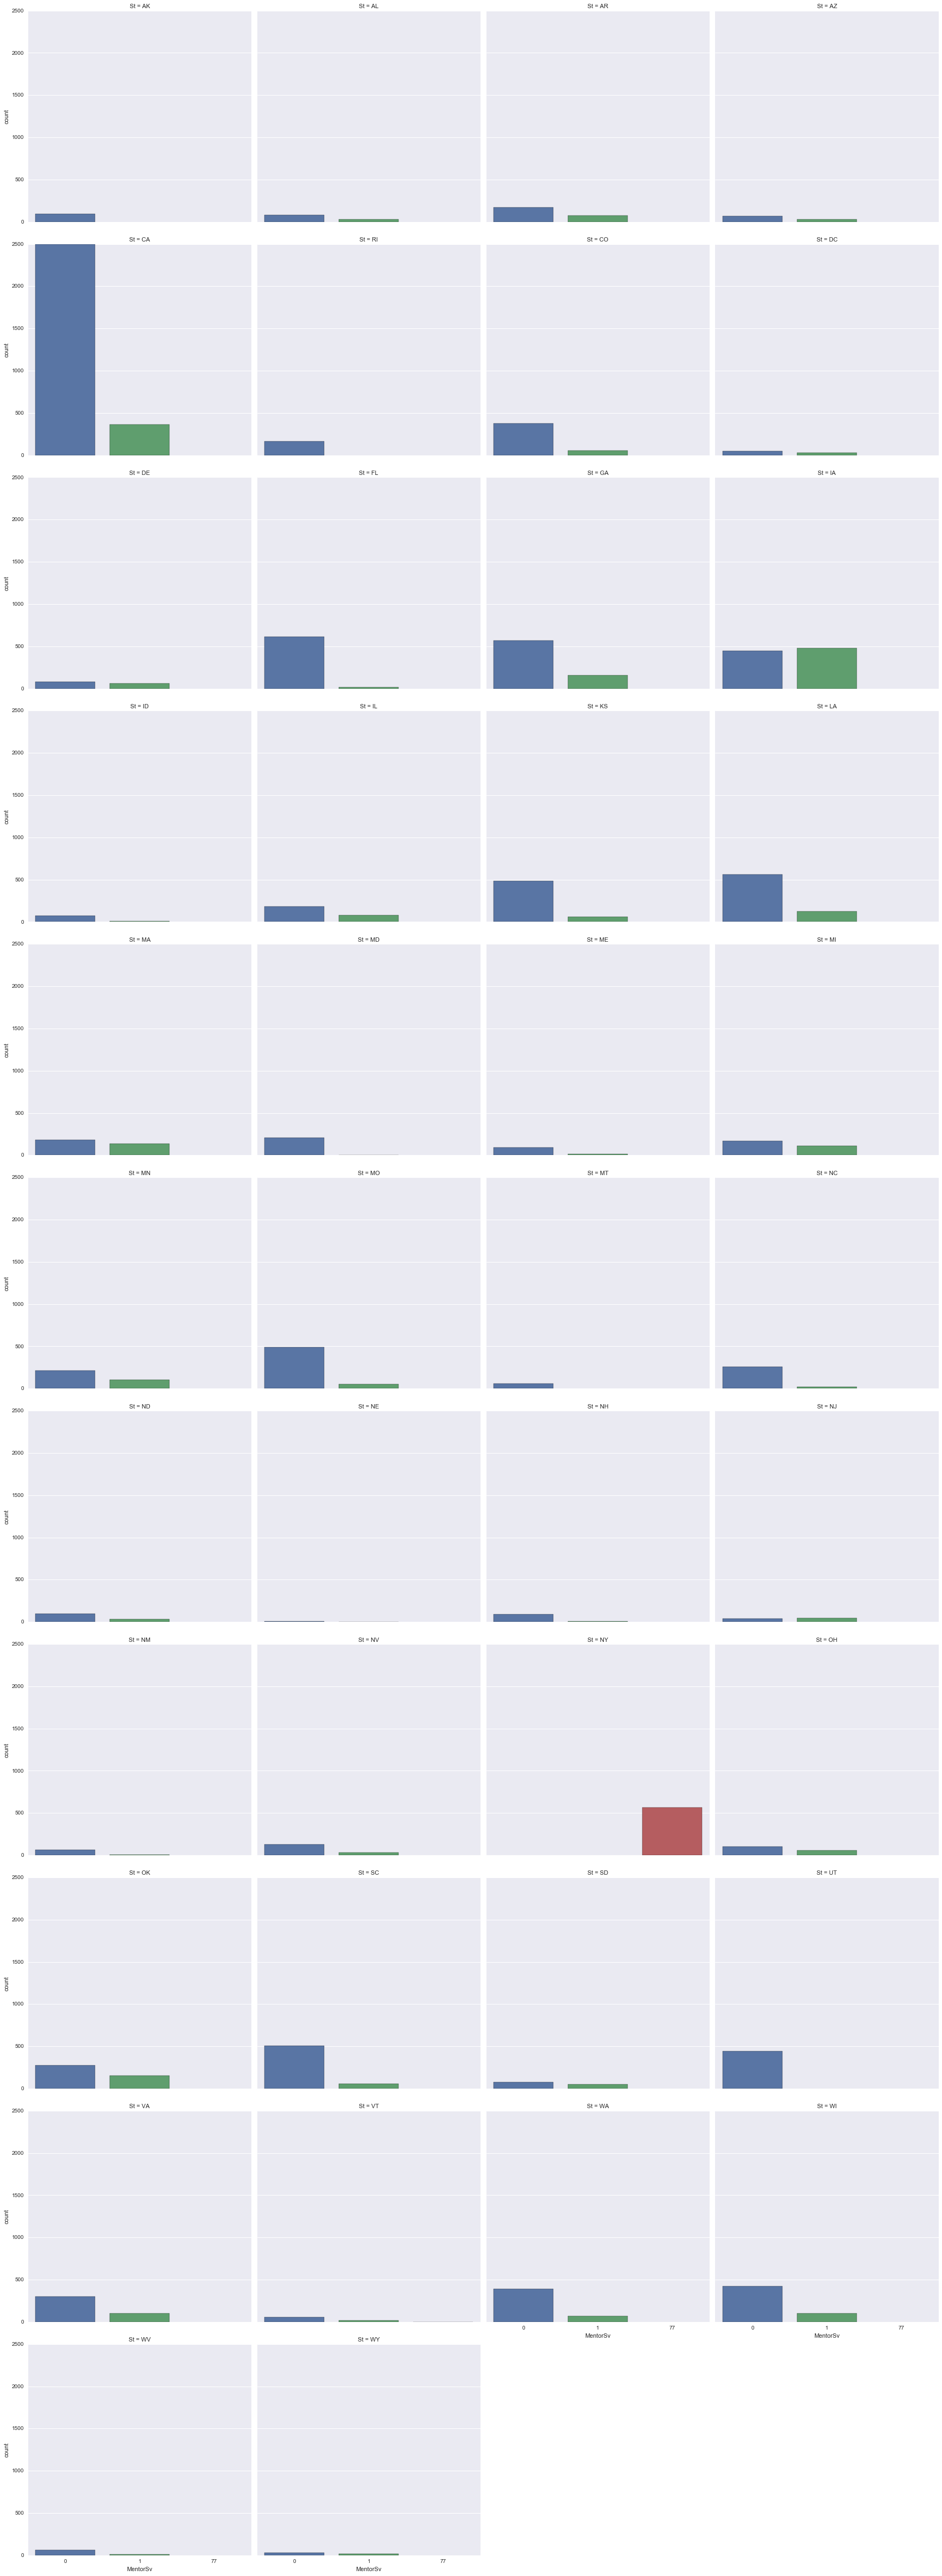

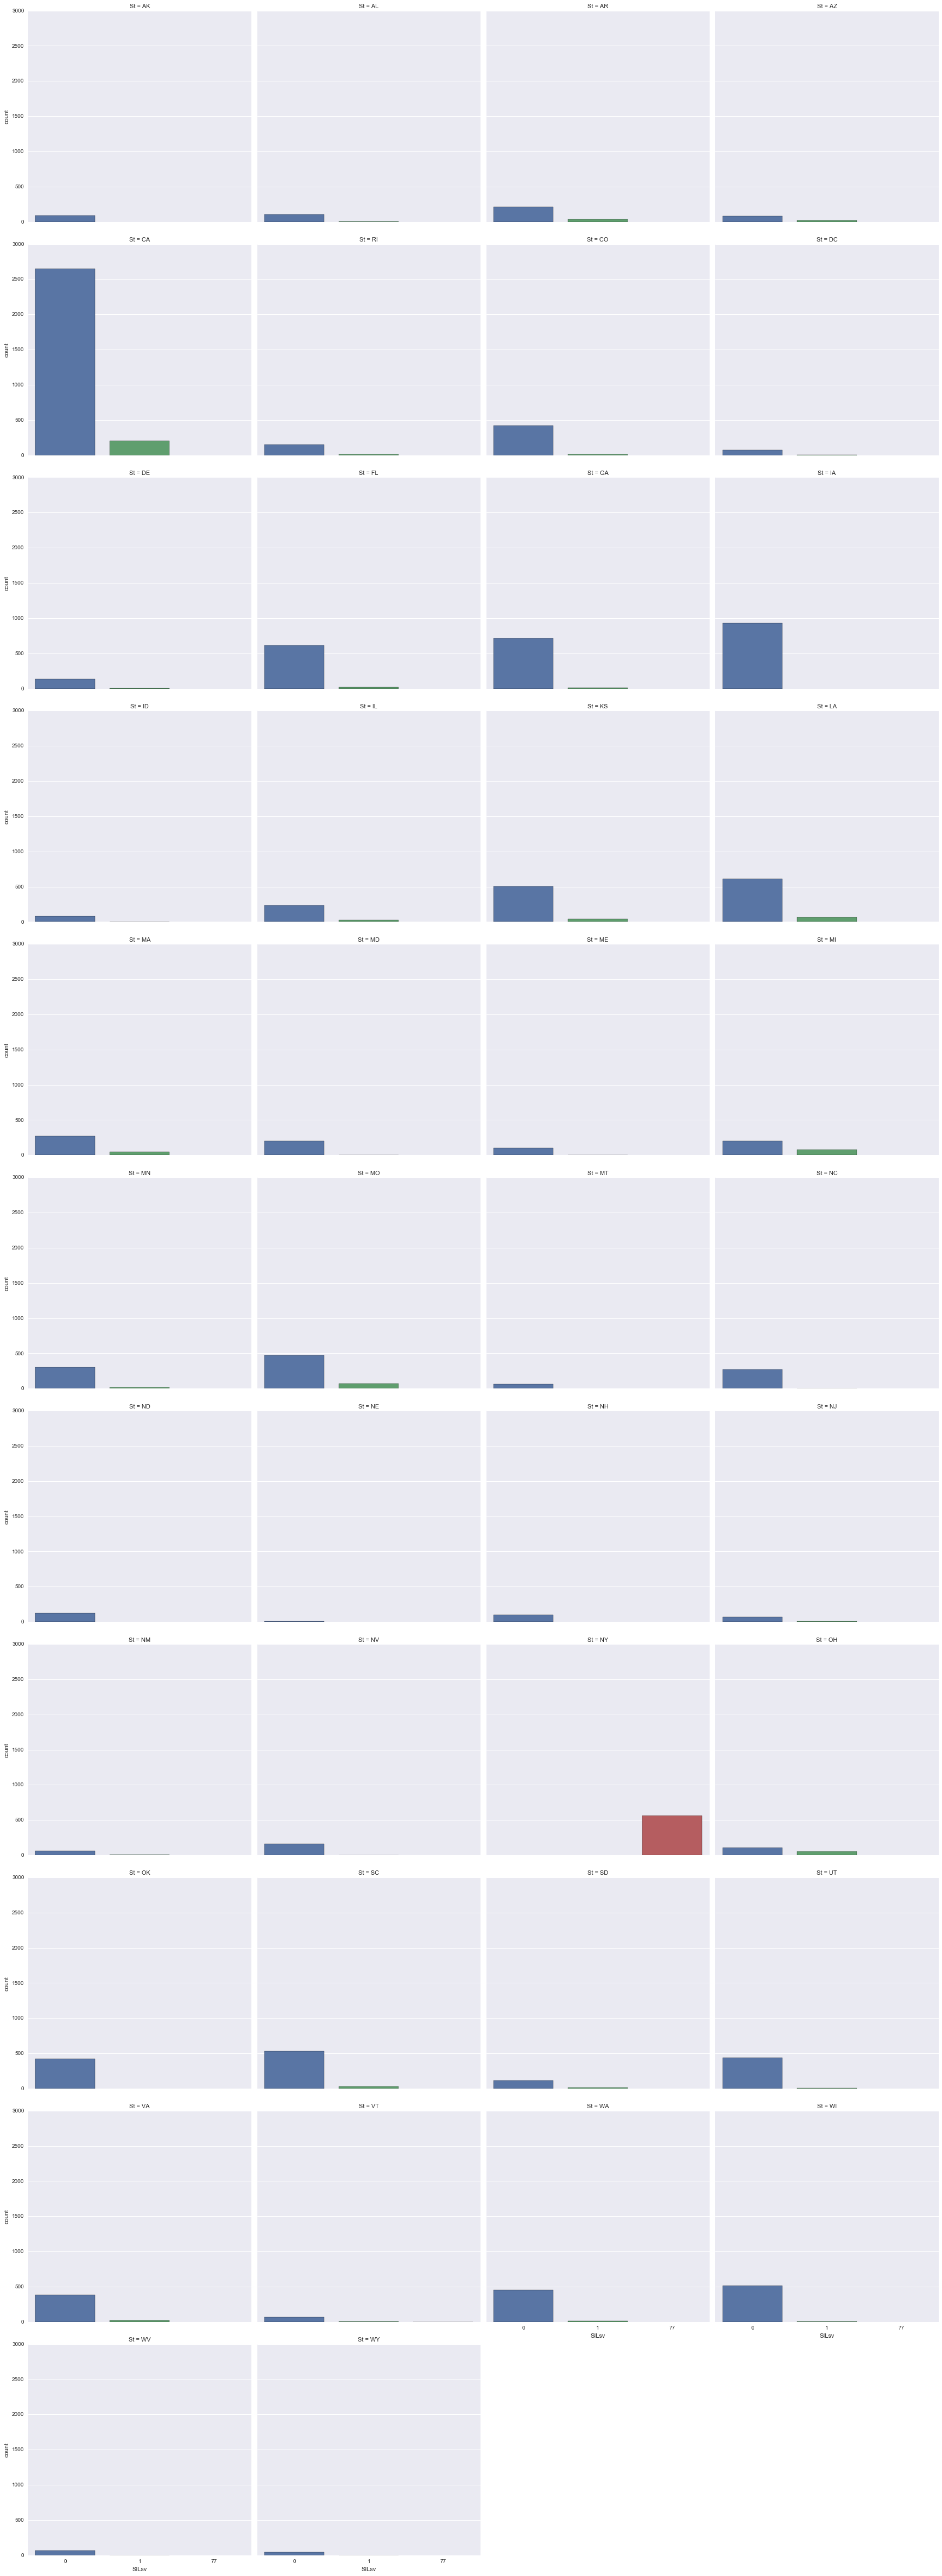

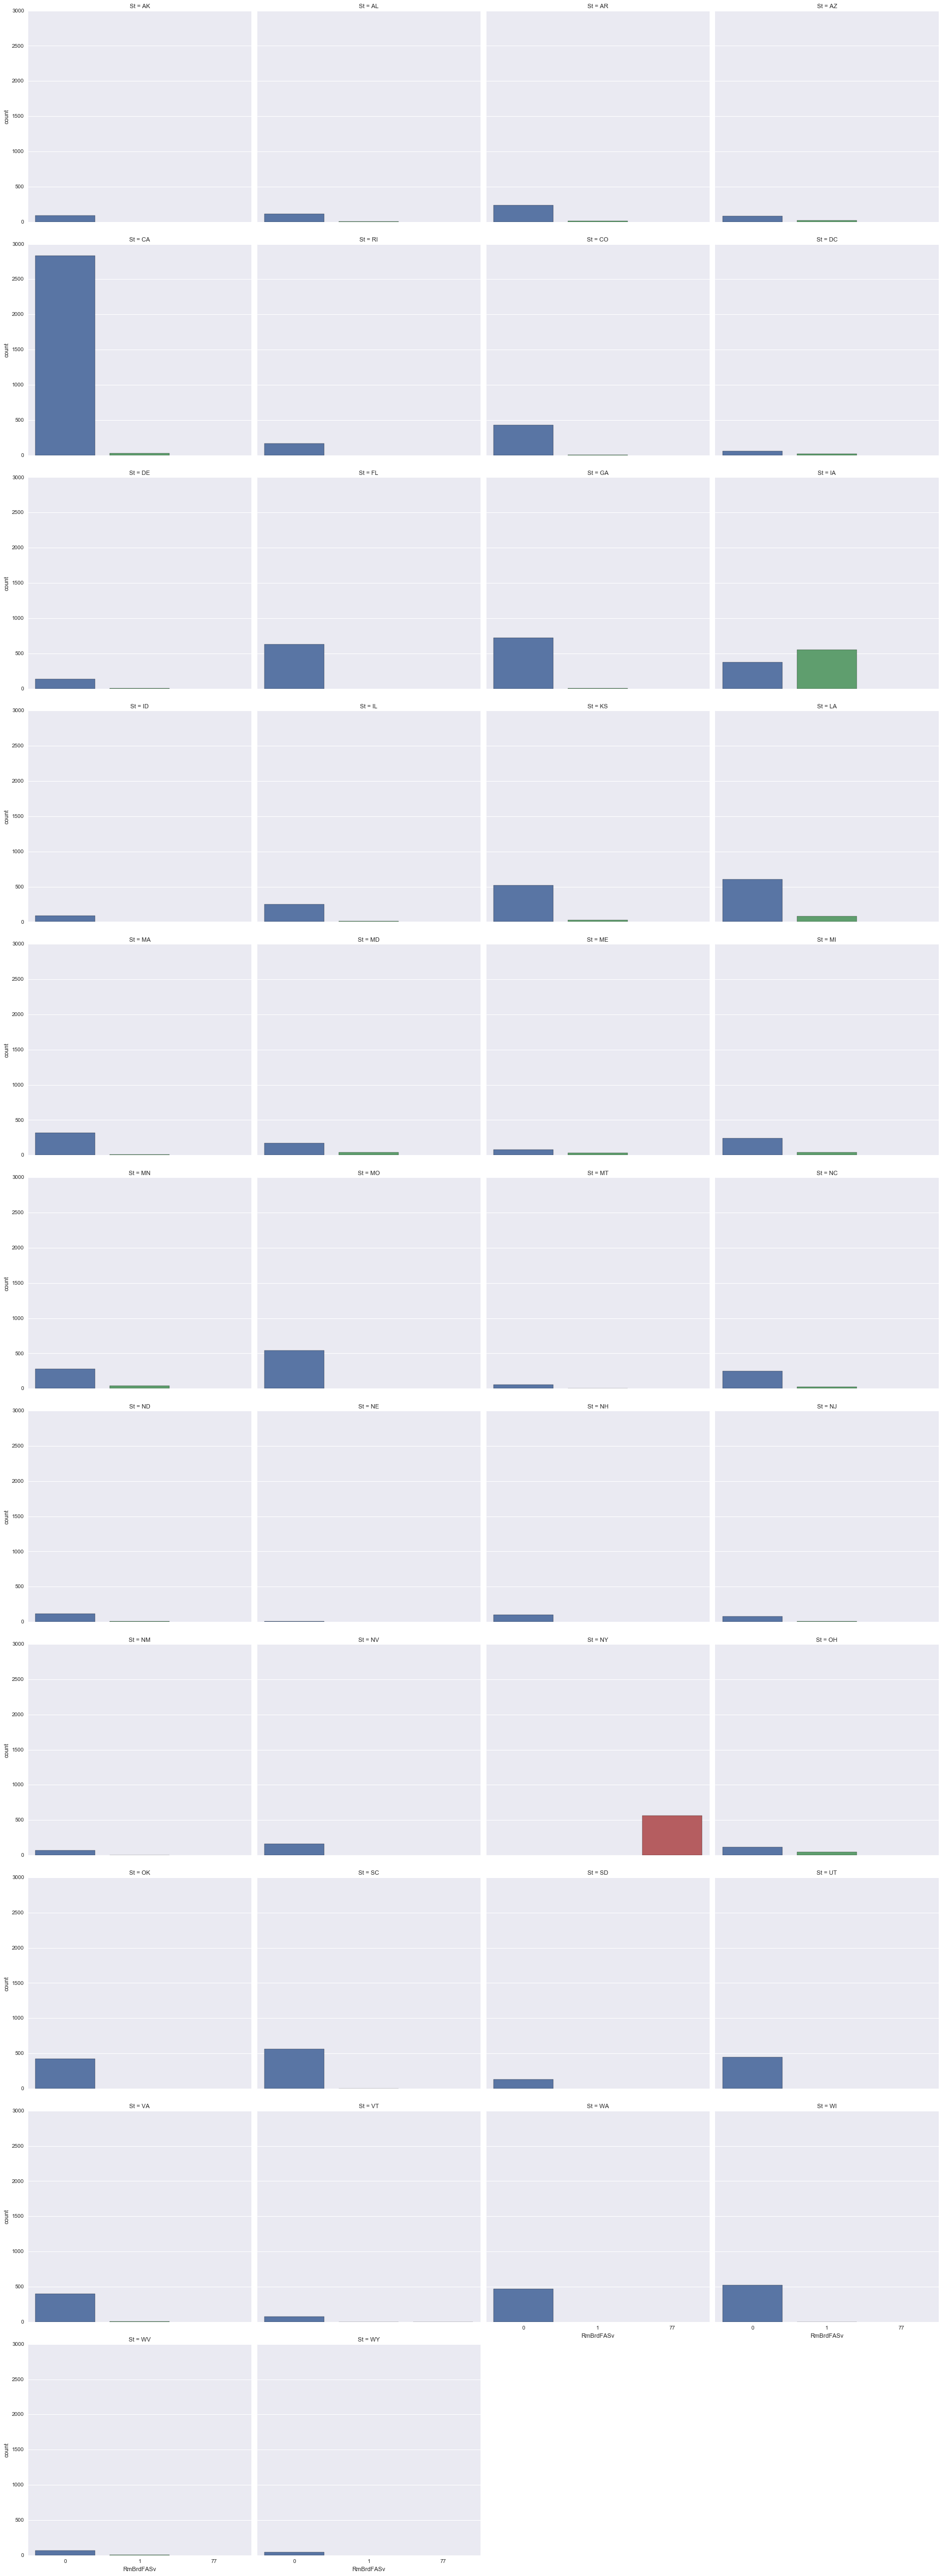

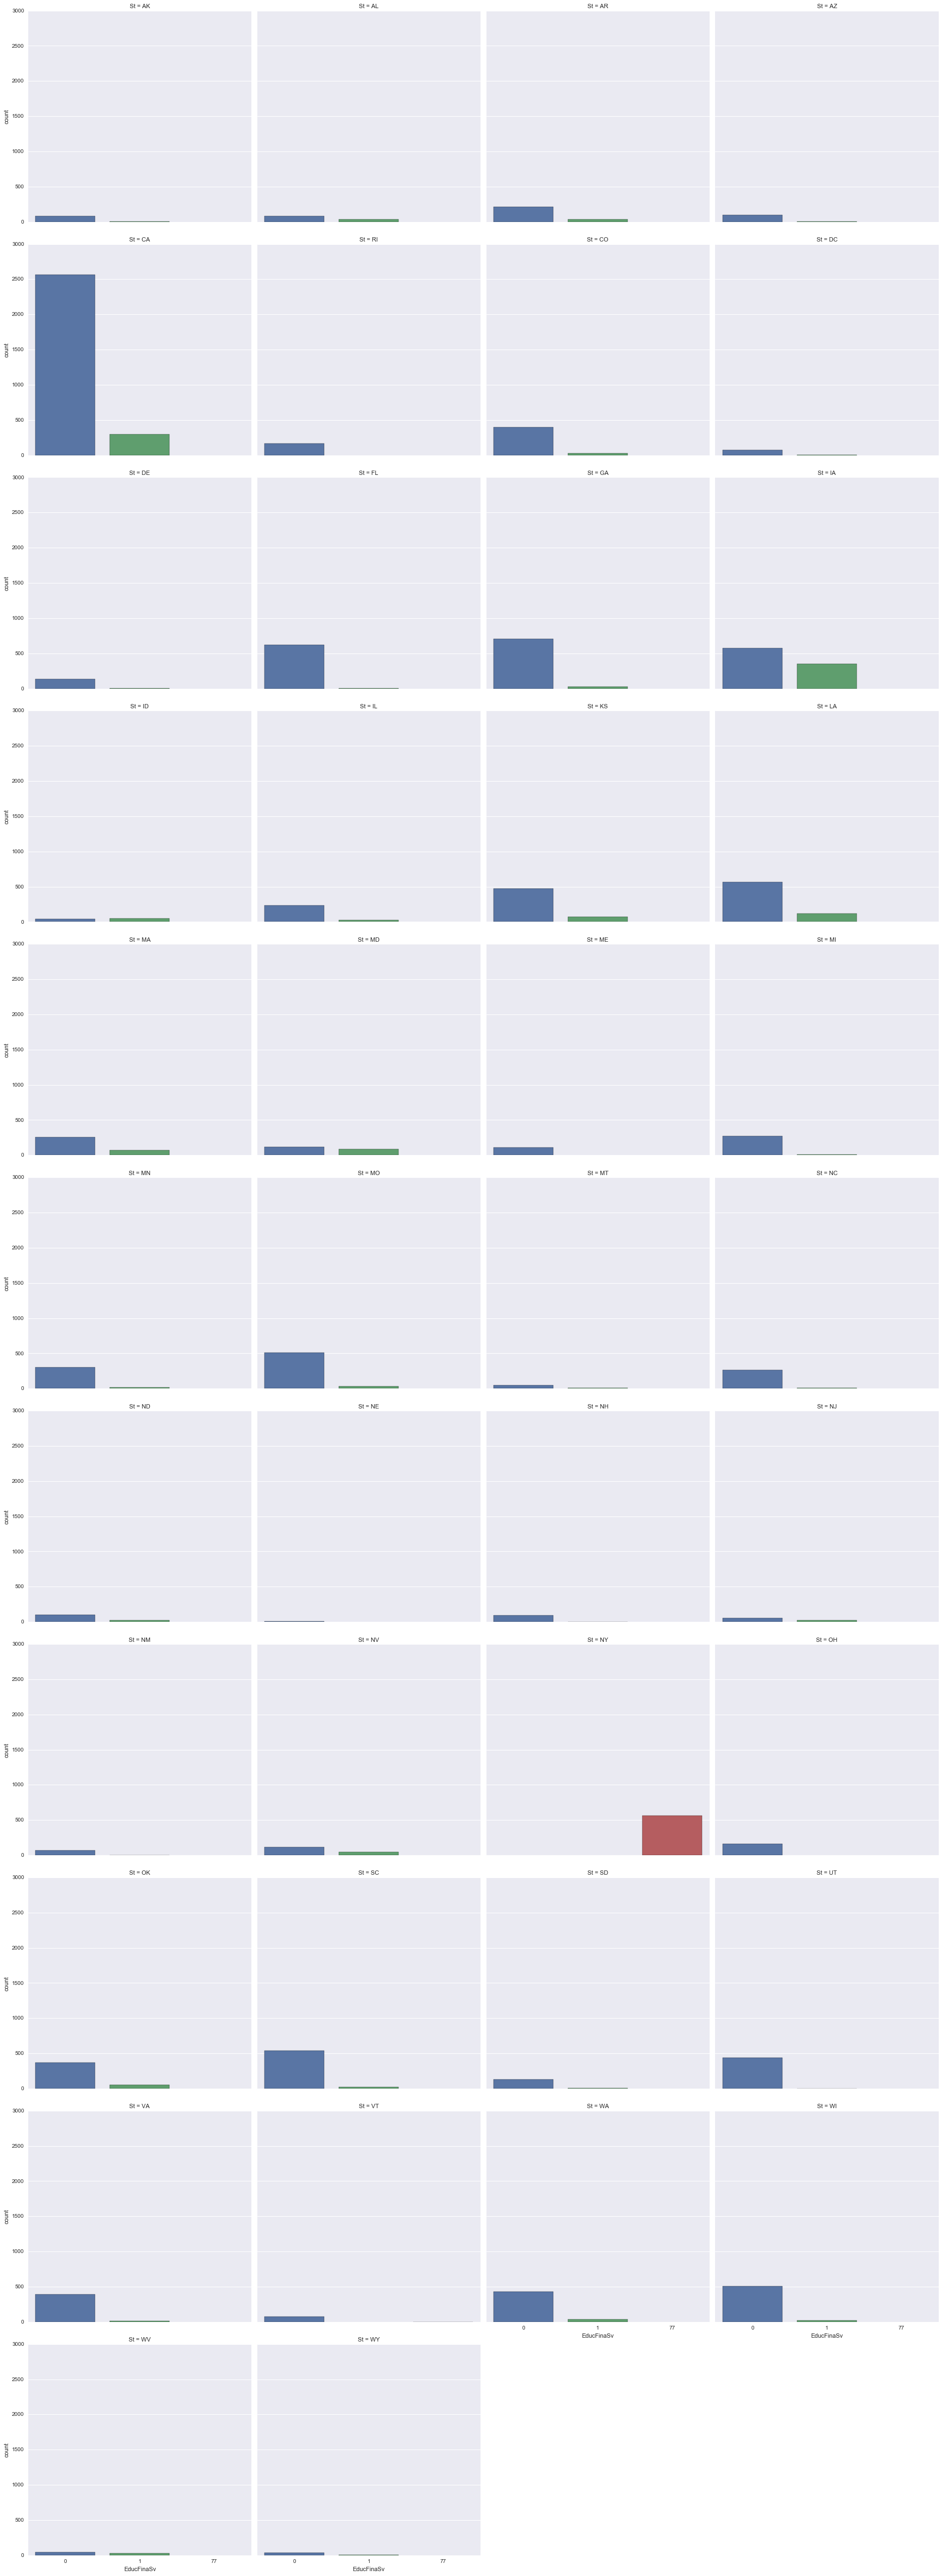

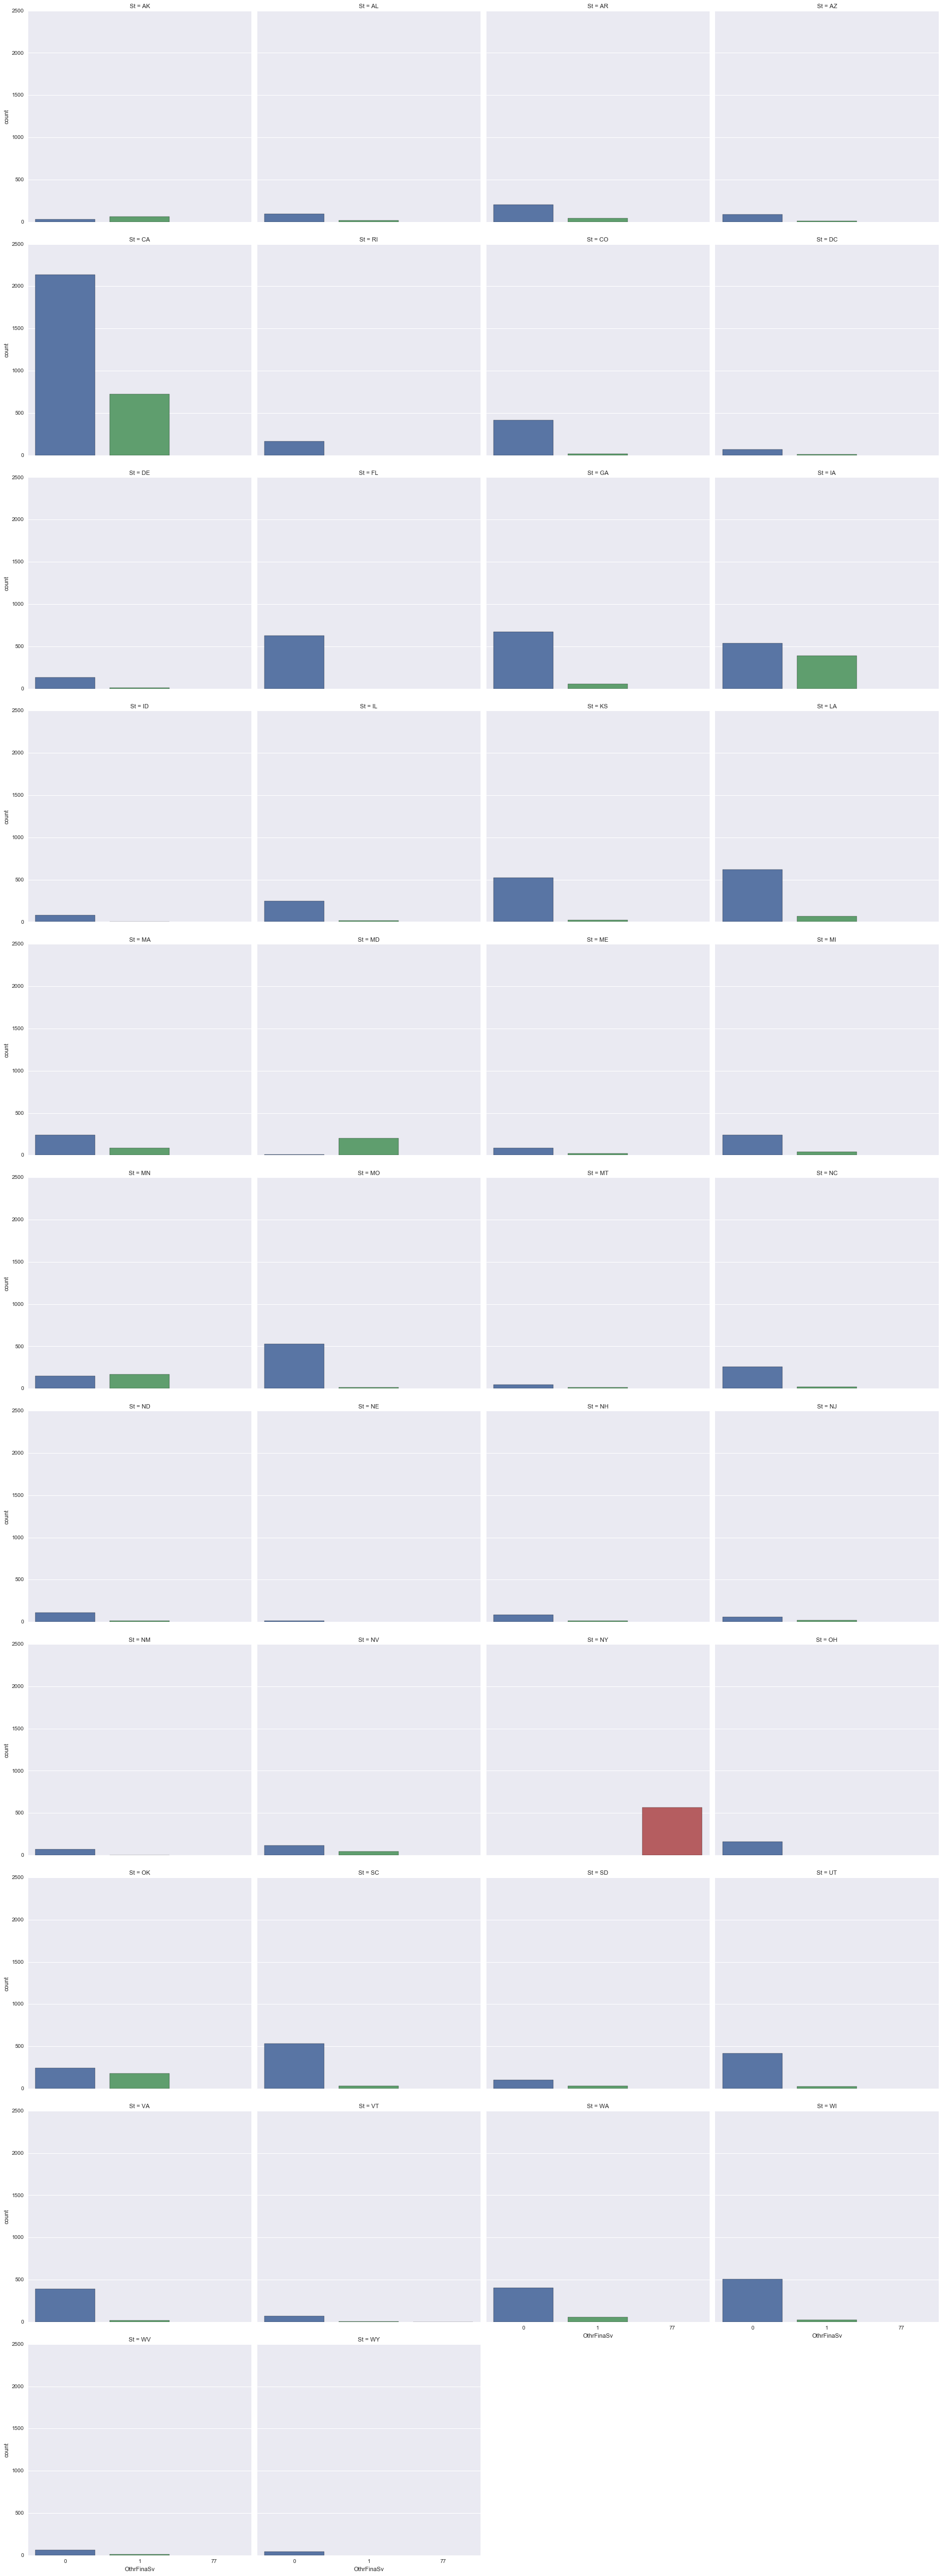

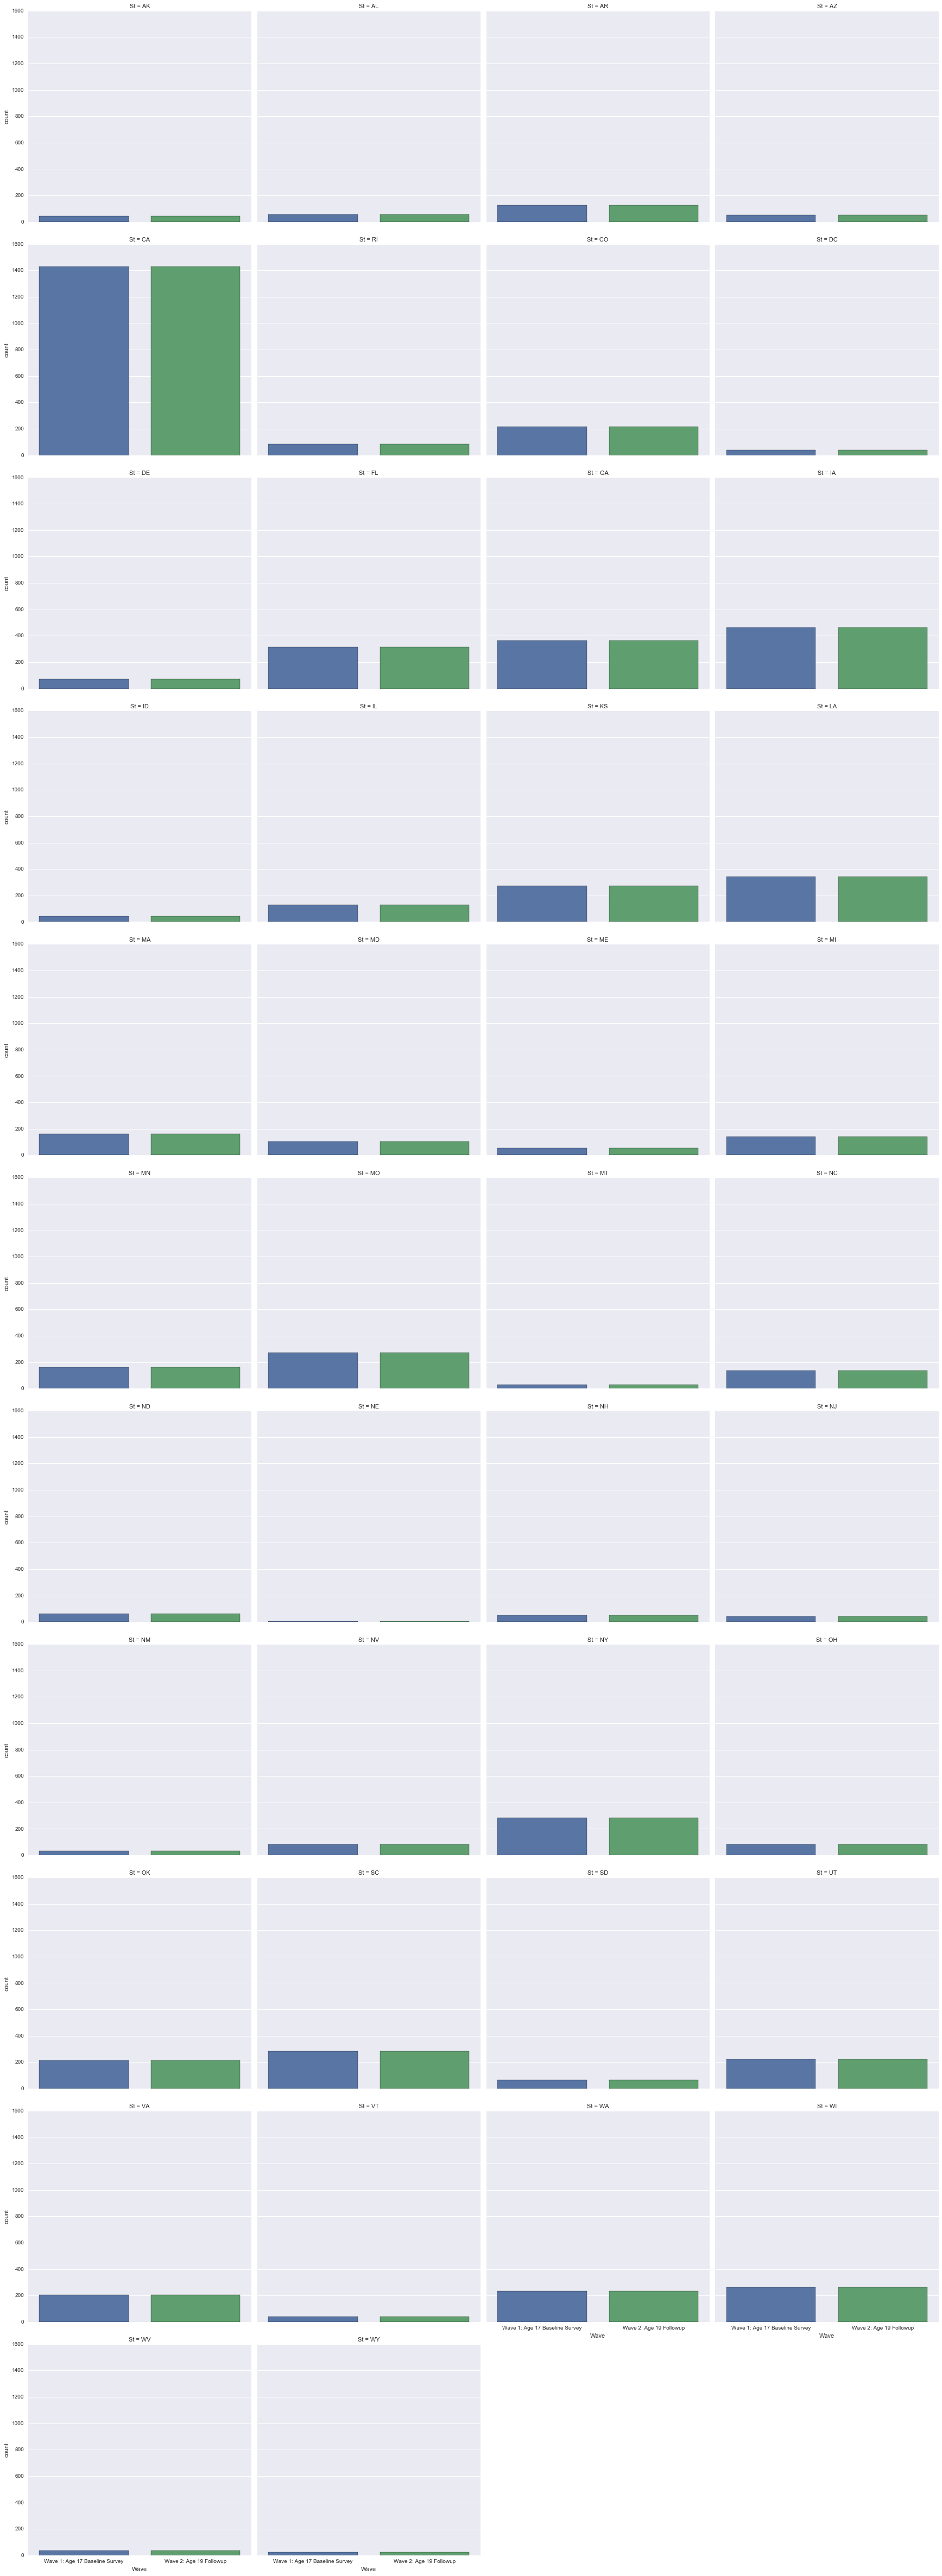

In [34]:
for column in features:

    sns.factorplot(column, col="St", col_wrap=4, data=cohort_1_w1w2, kind="count", size=6, aspect=1)